### BADASS Analysis - can we better tell the difference between butanoic acid, dodecanoic acid, palmitic acid, oleic acid and nervonic acid using a larger array of barrels?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Large array fatty acid data

In [3]:
l_fa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8'],  # Using 8 repeats even though 10 are available to match the amount of data available for the standard array
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Analysis/Large_array/Large_array_FAs/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Large_array/Large_array_FAs/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Large_array/Large_array_FAs/?y


Small array fatty acid data

In [4]:
s_fa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/FAs/Reformatted_FA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Large_array/Standard_array_FAs/',
    control_peptides=['GRP35'],
    control_analytes=['H', 'O', 'D', 'M', 'S', 'Pol', 'L', 'A', 'F', 'G']
)

Directory Analysis/Large_array/Standard_array_FAs/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Large_array/Standard_array_FAs/?y


Locate xlsx files

In [5]:
l_fa_fluor_data.group_xlsx_repeats()

In [6]:
s_fa_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [7]:
l_fa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/O_repeat_1.xlsx
 WARNING - fluorescence of (O + CCPent-I24K + DPH) is less than fluorescence of (O + DPH) alone. Analysis will continue but please CHECK YOUR DATA. 
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/B_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/P_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/D_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large

In [8]:
s_fa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/FAs/Reformatted_FA_csvs/F_G_M_P_S_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/FAs/Reformatted_FA_csvs/A_L_N_Ol_Pol_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/FAs/Reformatted_FA_csvs/B_D_DD_H_O_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/FAs/Reformatted_FA_csvs/B_D_DD_H_O_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/FAs/Reformatted_FA_csvs/A_L_N_Ol_Pol_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/FAs/Reformatted_FA_csvs/F_G_M_P_S_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_molecules/FAs/Reformatted_FA_csvs/B_D_DD_H_O_repeat_3.xlsx
Parsing plate /Users/ks17361/Lab_work_D

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [9]:
l_fa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: N, 5 (flagged readings = CCPent: 0.16779941665751208, GRP52: 0.060233973666012186) 


In [10]:
s_fa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

In [11]:
l_fa_fluor_data.ml_fluor_data

CCPent     QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   0.062063   1.681818     0.008750     0.097138     0.173016  0.019171   
1   0.066087   1.538462     0.006339     0.079017     0.258288  0.018406   
2   0.081692   1.381910     0.005407     0.075357     0.321024  0.022406   
3   0.071201   1.640351     0.003875     0.063482     0.296945  0.022983   
4   0.081579   1.631944     0.006465     0.066950     0.194404  0.024451   
5   0.057734   1.833333     0.011801     0.114172     0.223357  0.016017   
6   0.044842   0.839080     0.005967     0.135403     0.148415  0.010459   
7   0.047362   1.020833     0.005980     0.103364     0.159434  0.012905   
8   0.148266  10.898551     0.046587     0.303799     0.120764  0.024628   
9   0.150689   8.616352     0.031308     0.269366     0.122485  0.022403   
10  0.134739   9.131387     0.042102     0.251902     0.099580  0.022347   
11  0.144157   8.353846     0.032018     0.195077     0.091621  0.023343   
12  0.140496   6.680233     0.035256     0.217786     0.091910  0.027553   
13  0.170604   5.456000     0.014097     0.117293     0.102808  0.025129   
14  0.179082   3.084112     0.021682     0.138316     0.127927  0.026663   
15  0.045607   0.661202     0.006825     0.121669     0.420932  0.006803   
16  0.054125   0.739130     0.005830     0.132827     0.441681  0.006874   
17  0.055639   0.971631     0.006516     0.140290     0.554430  0.008491   
18  0.057048   0.572254     0.006358     0.133426     0.479014  0.009088   
19  0.056074   1.038043     0.009396     0.112380     0.304307  0.008337   
20  0.047794   1.297710     0.008264     0.109551     0.576740  0.009534   
21  0.060709   1.091892     0.009088     0.103913     0.457480  0.011653   
22  0.048991   0.601064     0.005819     0.096681     0.502240  0.007795   
23  0.903368   1.453901     0.554593     1.190752     1.075472  0.489449   
24  0.855617   0.685393     0.576447     1.255267     1.058119  0.540944   
25  1.052817   0.842105     0.963315     1.332277     1.042014  0.515465   
26  0.996725   1.167513     0.710384     1.417928     1.059033  0.515466   
27  0.894747   1.079545     0.732024     1.409620     1.108137  0.502970   
28  0.877188   1.007042     0.679841     1.231749     1.040937  0.502865   
29  0.889601   1.029070     0.719770     1.106825     1.105547  0.487414   
30  0.881351   1.024096     0.678937     1.304746     1.131148  0.533250   
31  1.022571   0.952756     0.753516     1.087744     0.998670  0.631529   
32  1.176855   1.125714     0.652254     1.008486     1.148558  0.657004   
33  1.004083   1.343511     0.757447     1.124091     1.094118  0.668542   
34  0.932209   1.280000     0.688117     0.967367     1.057789  0.697742   
35  0.924206   1.282759     0.777142     1.084270     1.037485  0.685886   
36  0.948754   1.227273     0.878522     1.004671     1.018159  0.698780   
37  1.046289   1.159722     0.832239     1.103595     1.166603  0.720903   
38  1.004783   0.975976     0.861914     1.155559     1.204928  0.726710   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   0.033922  0.015760     0.025135     0.072880  ...          0.035065   
1   0.025772  0.016326     0.030727     0.083970  ...          0.024957   
2   0.030396  0.017883     0.071625     0.104929  ...          0.021377   
3   0.027129  0.016442     0.037316     0.088115  ...          0.017352   
4   0.027895  0.018609     0.030466     0.080415  ...          0.022268   
5   0.032250  0.013764     0.042895     0.064770  ...          0.044203   
6   0.022233  0.016102     0.011453     0.078151  ...          0.045762   
7   0.020139  0.016260     0.009733     0.075347  ...          0.035295   
8   0.274981  0.038749     0.254368     0.302122  ...          0.106926   
9   0.299807  0.040383     0.246034     0.229747  ...          0.100787   
10  0.251772  0.036533     0.237000     0.218262  ...          0.119219   
11  0.286811  0.036867     0.208114     0.211769  ...          0.

In [12]:
s_fa_fluor_data.ml_fluor_data

GRP22     GRP46     GRP51     GRP52     GRP63     GRP80      Pent  \
0   0.041427  1.203119  0.138905  0.440361  0.096765  0.198721  0.167970   
1   0.040878  1.154417  0.085540  0.193548  0.083867  0.162838  0.141511   
2   0.038017  1.353037  0.069089  0.245895  0.079113  0.194291  0.133490   
3   0.038815  2.757755  0.215979  0.053315  0.103108  0.603903  0.239820   
4   0.038929  2.496933  0.170911  0.249635  0.103019  0.569598  0.235203   
5   0.125332  1.750152  0.049351  0.016517  0.064614  0.342099  0.129875   
6   0.100412  2.352428  0.055235  0.014445  0.060614  0.322314  0.139187   
7   0.124554  2.328707  0.057386  0.015618  0.060783  0.336443  0.114564   
8   0.016166  1.408419  0.190909  0.004555  0.005369  0.227603  0.063467   
9   0.017991  2.232484  0.179494  0.005892  0.007436  0.286891  0.078808   
10  0.019261  1.883537  0.224954  0.005472  0.007412  0.227222  0.075540   
11  0.017298  1.795961  0.236570  0.005179  0.007227  0.241766  0.075872   
12  0.019587  1.608349  0.219904  0.004596  0.006460  0.233025  0.070864   
13  0.030270  1.547590  0.066450  0.002785  0.002979  0.134406  0.042711   
14  0.031667  1.801242  0.072499  0.002514  0.003106  0.145538  0.046878   
15  0.025888  1.715706  0.065873  0.002925  0.002986  0.117255  0.035590   
16  0.014612  6.863827  0.047253  0.004548  0.005614  0.367463  0.049632   
17  0.014909  4.127982  0.033587  0.004460  0.005237  0.312469  0.047465   
18  0.014888  4.210647  0.035680  0.005139  0.006797  0.333008  0.049610   
19  0.017162  6.065731  0.149018  0.005642  0.012619  0.665122  0.093306   
20  0.016735  5.170245  0.138293  0.008364  0.012619  0.610596  0.090259   
21  0.077423  4.217972  0.031071  0.005682  0.008298  0.455640  0.053788   
22  0.067571  5.059728  0.030975  0.004244  0.008193  0.371942  0.061006   
23  0.074921  5.233017  0.029127  0.004706  0.008387  0.339571  0.049065   
24  0.968681  1.132396  1.015122  0.985707  1.036878  1.049074  1.013192   
25  0.962459  1.172698  0.976221  0.981216  1.019847  0.989457  0.976434   
26  0.943276  1.242894  0.929212  1.046715  1.019932  1.016714  0.949840   
27  0.950635  1.322184  0.944215  1.072939  1.114764  1.208366  1.123655   
28  0.964217  1.187551  0.970222  1.028891  1.020128  1.023371  1.006440   
29  0.772276  1.099153  1.017630  1.003030  1.005504  1.070044  1.020468   
30  0.772085  0.980282  0.981717  1.019774  0.989486  1.079040  0.987699   
31  0.790543  1.028011  1.014046  1.023943  0.976084  1.076609  0.989914   
32  0.939659  0.963018  0.955205  0.960363  0.998465  1.057207  0.961612   
33  0.948529  1.171429  0.957318  0.966610  1.014326  0.997416  0.951612   
34  0.942962  1.220284  0.920011  1.015539  0.996565  0.980115  0.933908   
35  0.903330  1.272355  0.880136  1.007474  0.995289  1.020600  0.959419   
36  1.026819  1.353808  1.051465  1.094406  1.072306  1.130733  1.149548   
37  0.743561  1.160550  1.024653  1.003183  0.986999  1.061120  0.935739   
38  0.691878  1.028169  0.982394  1.012899  0.986995  1.071470  0.995033   
39  0.814954  1.208683  1.028117  1.018156  0.987110  1.139669  1.007818   

         Hex      Hex2      Hept       24D       24E       24K       17K  \
0   0.419108  0.095013  0.157773  0.045966  0.038249  0.025067  0.756240   
1   0.403202  0.158680  0.176726  0.047179  0.035176  0.024805  0.933279   
2   0.404988  0.134621  0.169149  0.047888  0.038415  0.023865  0.895517   
3   0.645505  0.220098  0.376707  0.110608  0.109593  0.096562  1.375067   
4   0.490572  0.264663  0.431993  0.118114  0.090381  0.069768  1.572581   
5   0.882550  0.197311  0.173154  0.082529  0.045248  0.058067  1.354131   
6   0.901139  0.129714  0.160863  0.072592  0.041865  0.056451  0.951650   
7   1.100197  0.147055  0.162344  0.065005  0.035976  0.046846  1.101876   
8   0.056578  0.075960  0.774826  0.114941  0.068618  0.052315  1.565561   
9   0.051822  0.074769  0.632152  0.108206  0.061806  0.054672  1.329108   
10  0.052704  0.093626  0.720374  0.117754  0.069664  

In [13]:
l_fa_fluor_data = l_fa_fluor_data.ml_fluor_data
s_fa_fluor_data = s_fa_fluor_data.ml_fluor_data

Generates "representative" fingerprint for each class (by calculating the median for each feature)

O


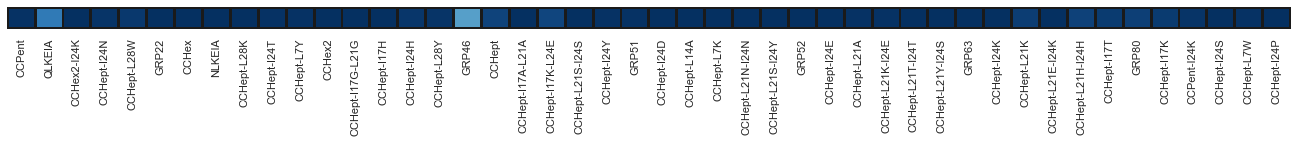

N


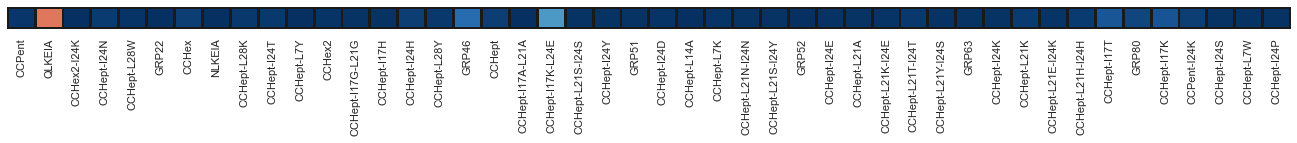

P


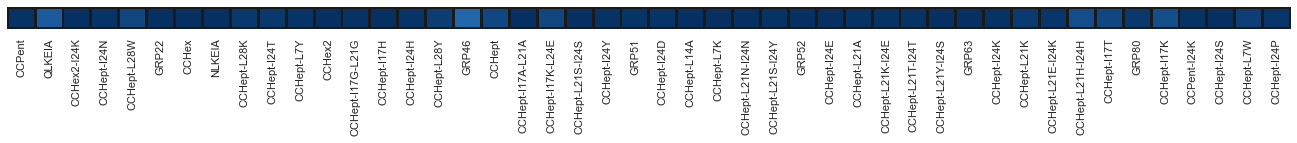

D


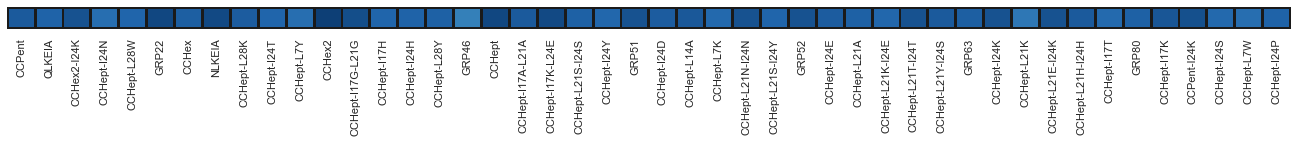

B


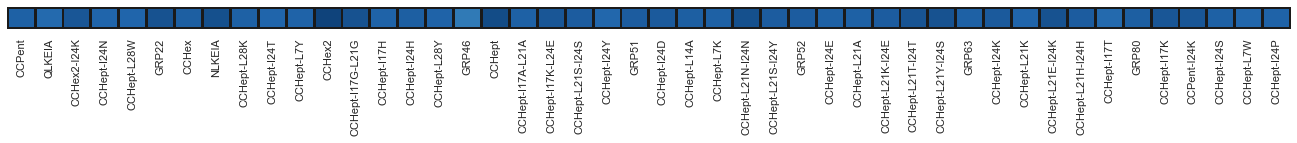

In [14]:
classes = []
for class_name in l_fa_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
l_fa_fluor_data_x_val = l_fa_fluor_data.drop(['Analyte'], axis=1)
vmin = l_fa_fluor_data_x_val.values.min()
vmax = l_fa_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(l_fa_fluor_data.shape[0])
                     if l_fa_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(l_fa_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(23,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=l_fa_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

N


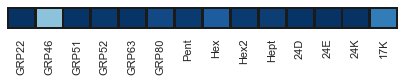

P


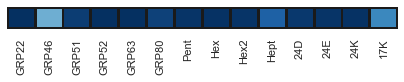

Ol


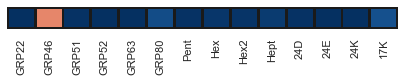

B


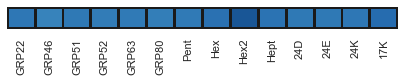

DD


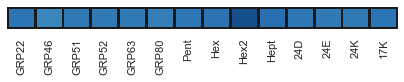

In [15]:
classes = []
for class_name in s_fa_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
s_fa_fluor_data_x_val = s_fa_fluor_data.drop(['Analyte'], axis=1)
vmin = s_fa_fluor_data_x_val.values.min()
vmax = s_fa_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(s_fa_fluor_data.shape[0])
                     if s_fa_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(s_fa_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(7,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=s_fa_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Generates box plots to compare the distribution of values for each class across the 14 / 46 features

Butanoic acid


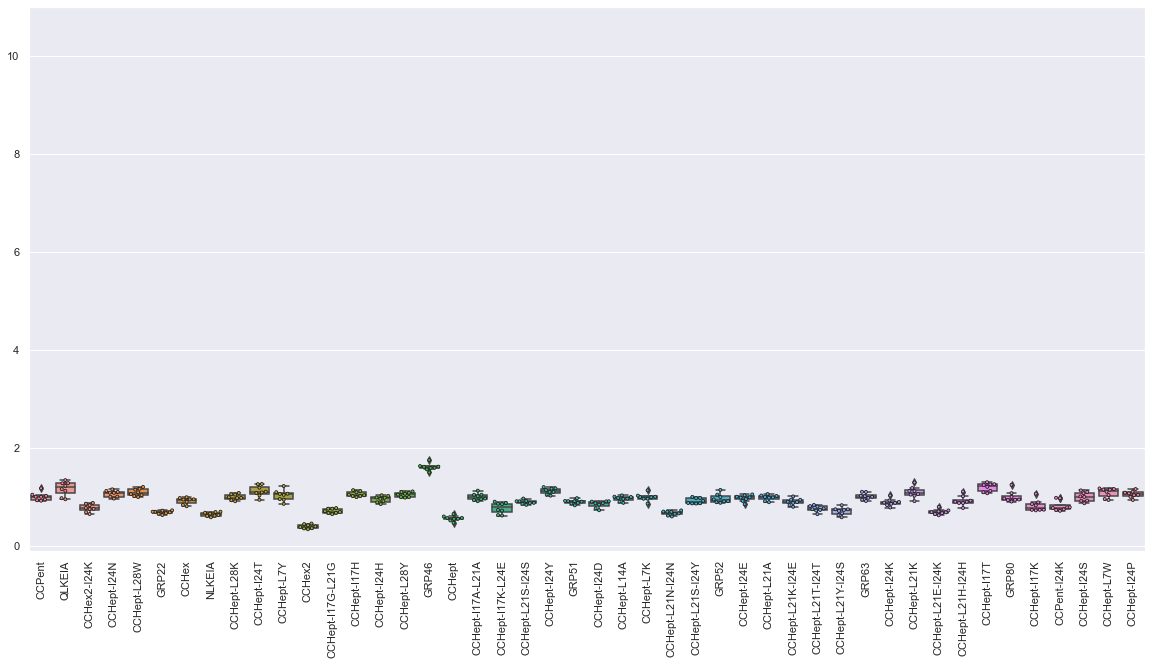

Dodecanoic acid


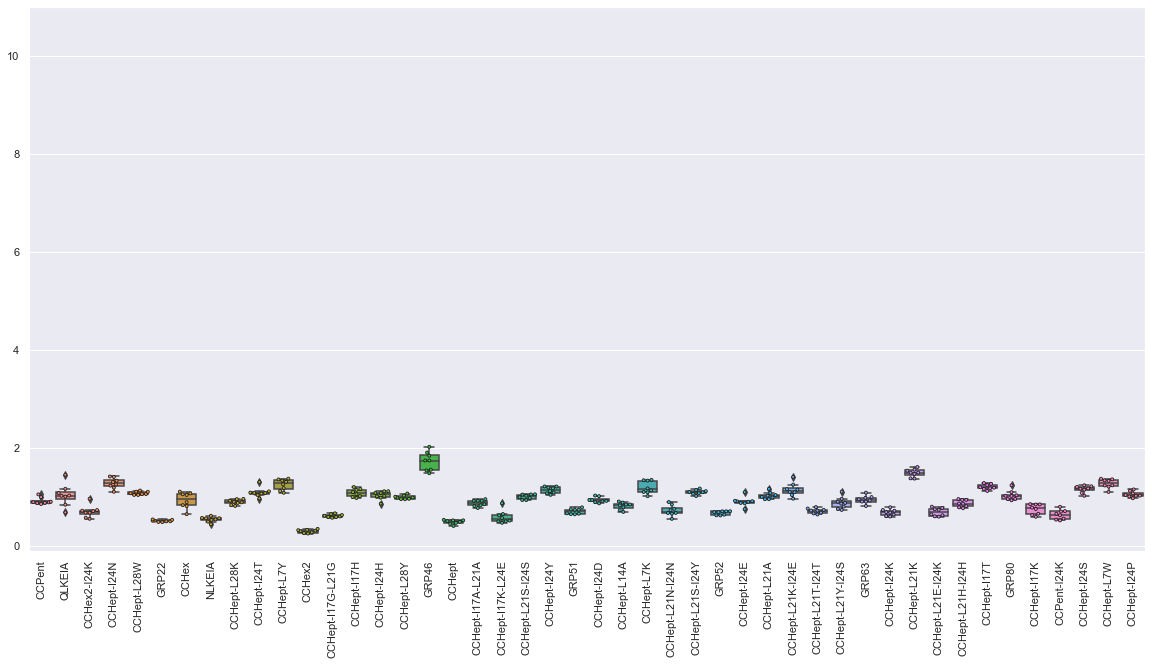

Palmitic acid


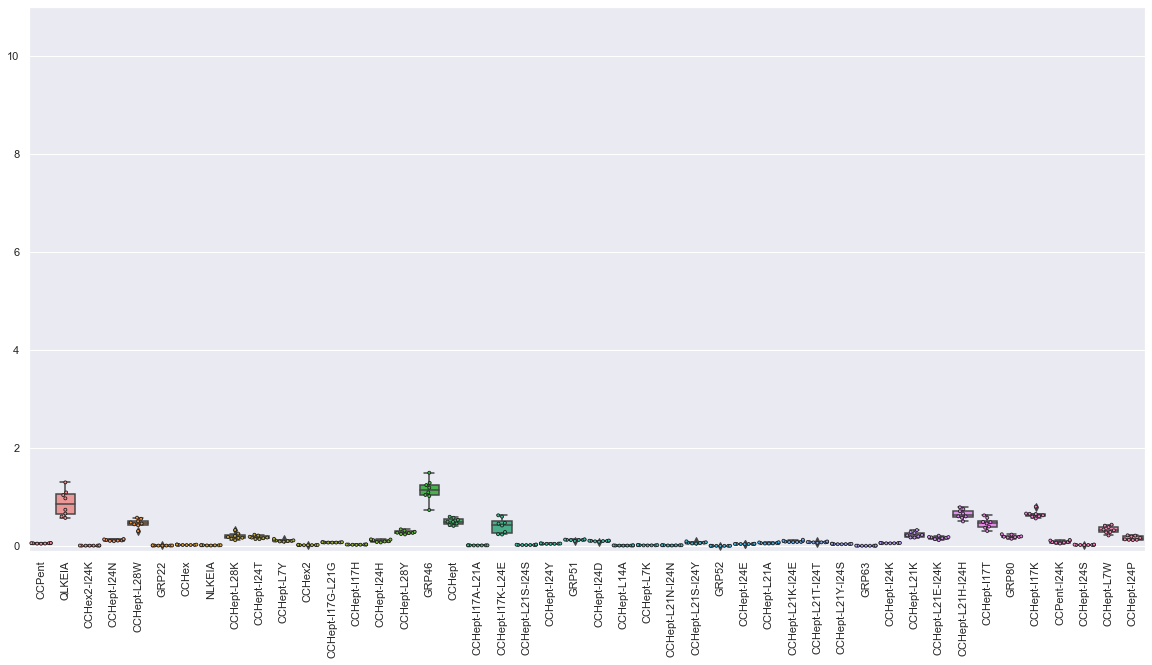

Oleic acid


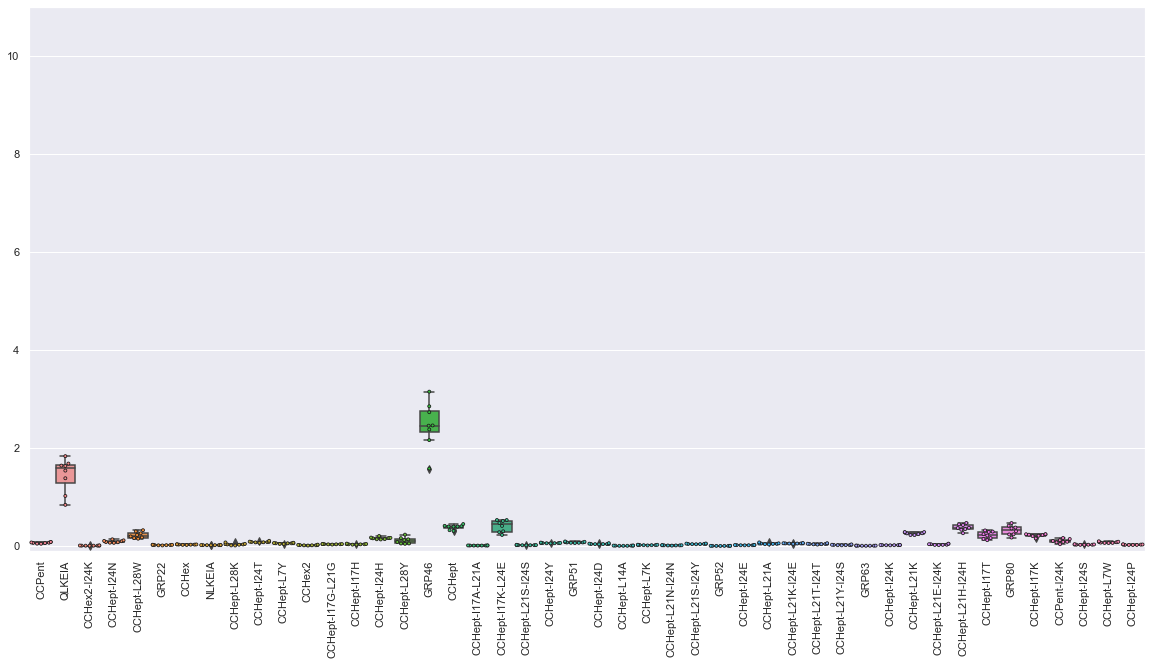

Nervonic acid


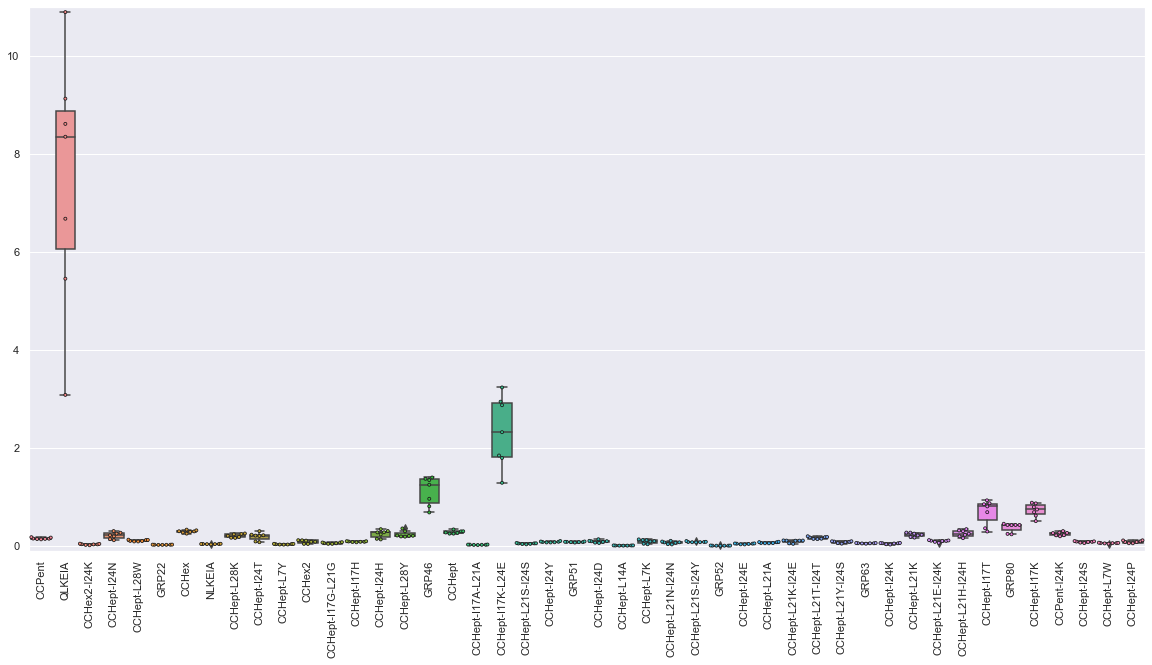

In [16]:
ymin = l_fa_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = l_fa_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

b_indices = [int(i) for i in range(l_fa_fluor_data.shape[0])
             if l_fa_fluor_data['Analyte'][i] == 'B']
dd_indices = [int(i) for i in range(l_fa_fluor_data.shape[0])
              if l_fa_fluor_data['Analyte'][i] == 'D']
p_indices = [int(i) for i in range(l_fa_fluor_data.shape[0])
             if l_fa_fluor_data['Analyte'][i] == 'P']
ol_indices = [int(i) for i in range(l_fa_fluor_data.shape[0])
              if l_fa_fluor_data['Analyte'][i] == 'O']
n_indices = [int(i) for i in range(l_fa_fluor_data.shape[0])
             if l_fa_fluor_data['Analyte'][i] == 'N']

sns.set(rc={'figure.figsize':(20,10)})
print('Butanoic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_fluor_data.iloc[b_indices])
sns.swarmplot(data=l_fa_fluor_data.iloc[b_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Dodecanoic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_fluor_data.iloc[dd_indices])
sns.swarmplot(data=l_fa_fluor_data.iloc[dd_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Palmitic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_fluor_data.iloc[p_indices])
sns.swarmplot(data=l_fa_fluor_data.iloc[p_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Oleic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_fluor_data.iloc[ol_indices])
sns.swarmplot(data=l_fa_fluor_data.iloc[ol_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Nervonic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_fluor_data.iloc[n_indices])
sns.swarmplot(data=l_fa_fluor_data.iloc[n_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

Butanoic acid


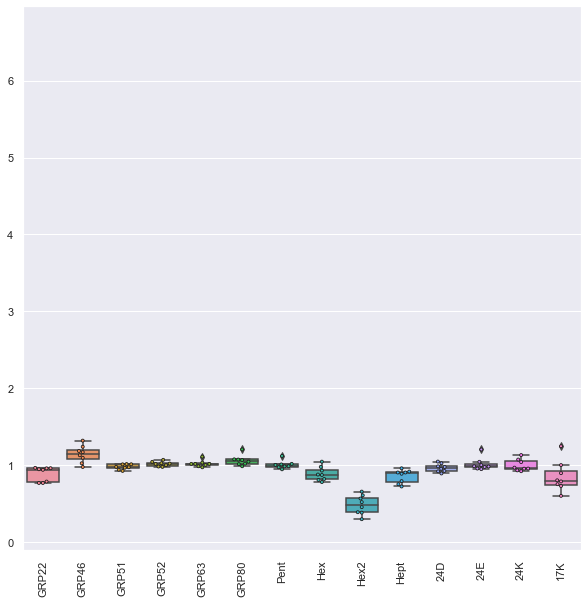

Dodecanoic acid


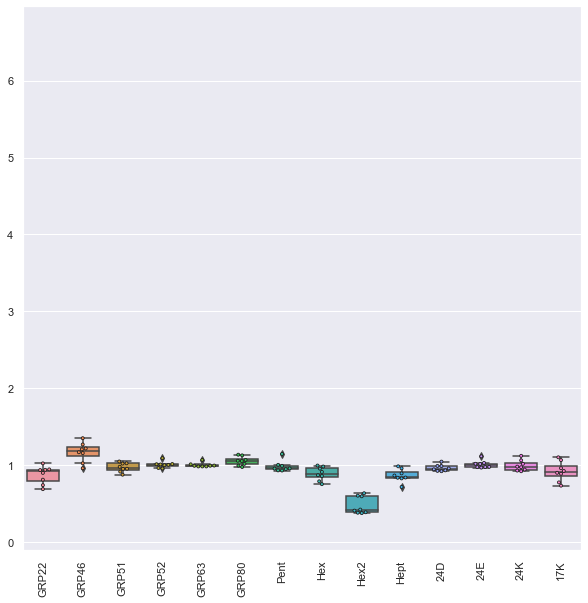

Palmitic acid


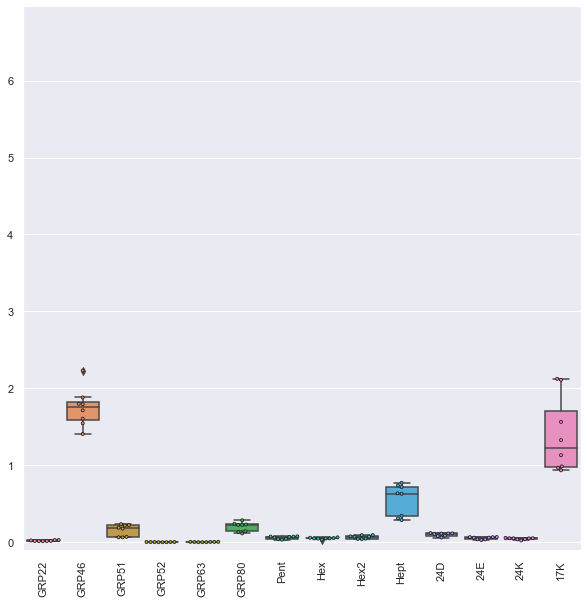

Oleic acid


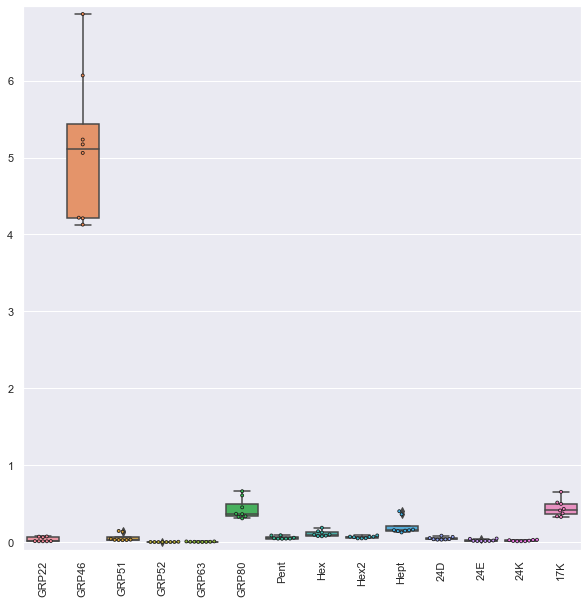

Nervonic acid


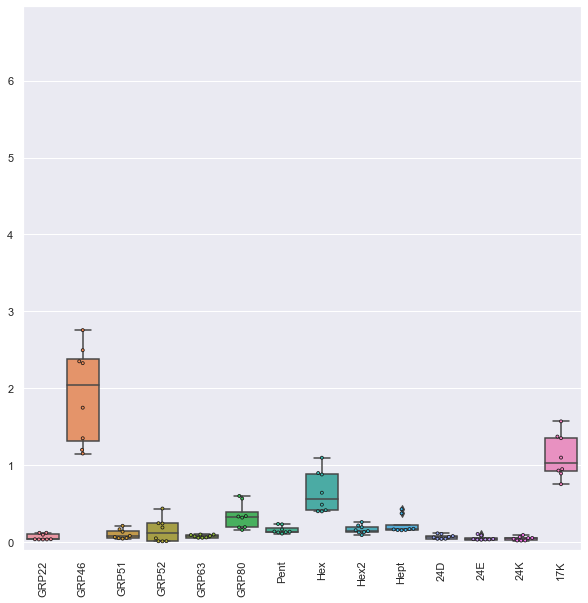

In [19]:
ymin = s_fa_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = s_fa_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

b_indices = [int(i) for i in range(s_fa_fluor_data.shape[0])
             if s_fa_fluor_data['Analyte'][i] == 'B']
dd_indices = [int(i) for i in range(s_fa_fluor_data.shape[0])
              if s_fa_fluor_data['Analyte'][i] == 'DD']
p_indices = [int(i) for i in range(s_fa_fluor_data.shape[0])
             if s_fa_fluor_data['Analyte'][i] == 'P']
ol_indices = [int(i) for i in range(s_fa_fluor_data.shape[0])
              if s_fa_fluor_data['Analyte'][i] == 'Ol']
n_indices = [int(i) for i in range(s_fa_fluor_data.shape[0])
             if s_fa_fluor_data['Analyte'][i] == 'N']

sns.set(rc={'figure.figsize':(10,10)})
print('Butanoic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_fa_fluor_data.iloc[b_indices])
sns.swarmplot(data=s_fa_fluor_data.iloc[b_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Dodecanoic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_fa_fluor_data.iloc[dd_indices])
sns.swarmplot(data=s_fa_fluor_data.iloc[dd_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Palmitic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_fa_fluor_data.iloc[p_indices])
sns.swarmplot(data=s_fa_fluor_data.iloc[p_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Oleic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_fa_fluor_data.iloc[ol_indices])
sns.swarmplot(data=s_fa_fluor_data.iloc[ol_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Nervonic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=s_fa_fluor_data.iloc[n_indices])
sns.swarmplot(data=s_fa_fluor_data.iloc[n_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

#### Run machine learning

In [20]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

- Large array

First split the data into a training and test set

In [21]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/FAs/'
                'FAs_large_array_ML_results/', fluor_data=l_fa_fluor_data
)

Directory /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/FAs/FAs_large_array_ML_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/FAs/FAs_large_array_ML_results/?y


In [22]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 46 features

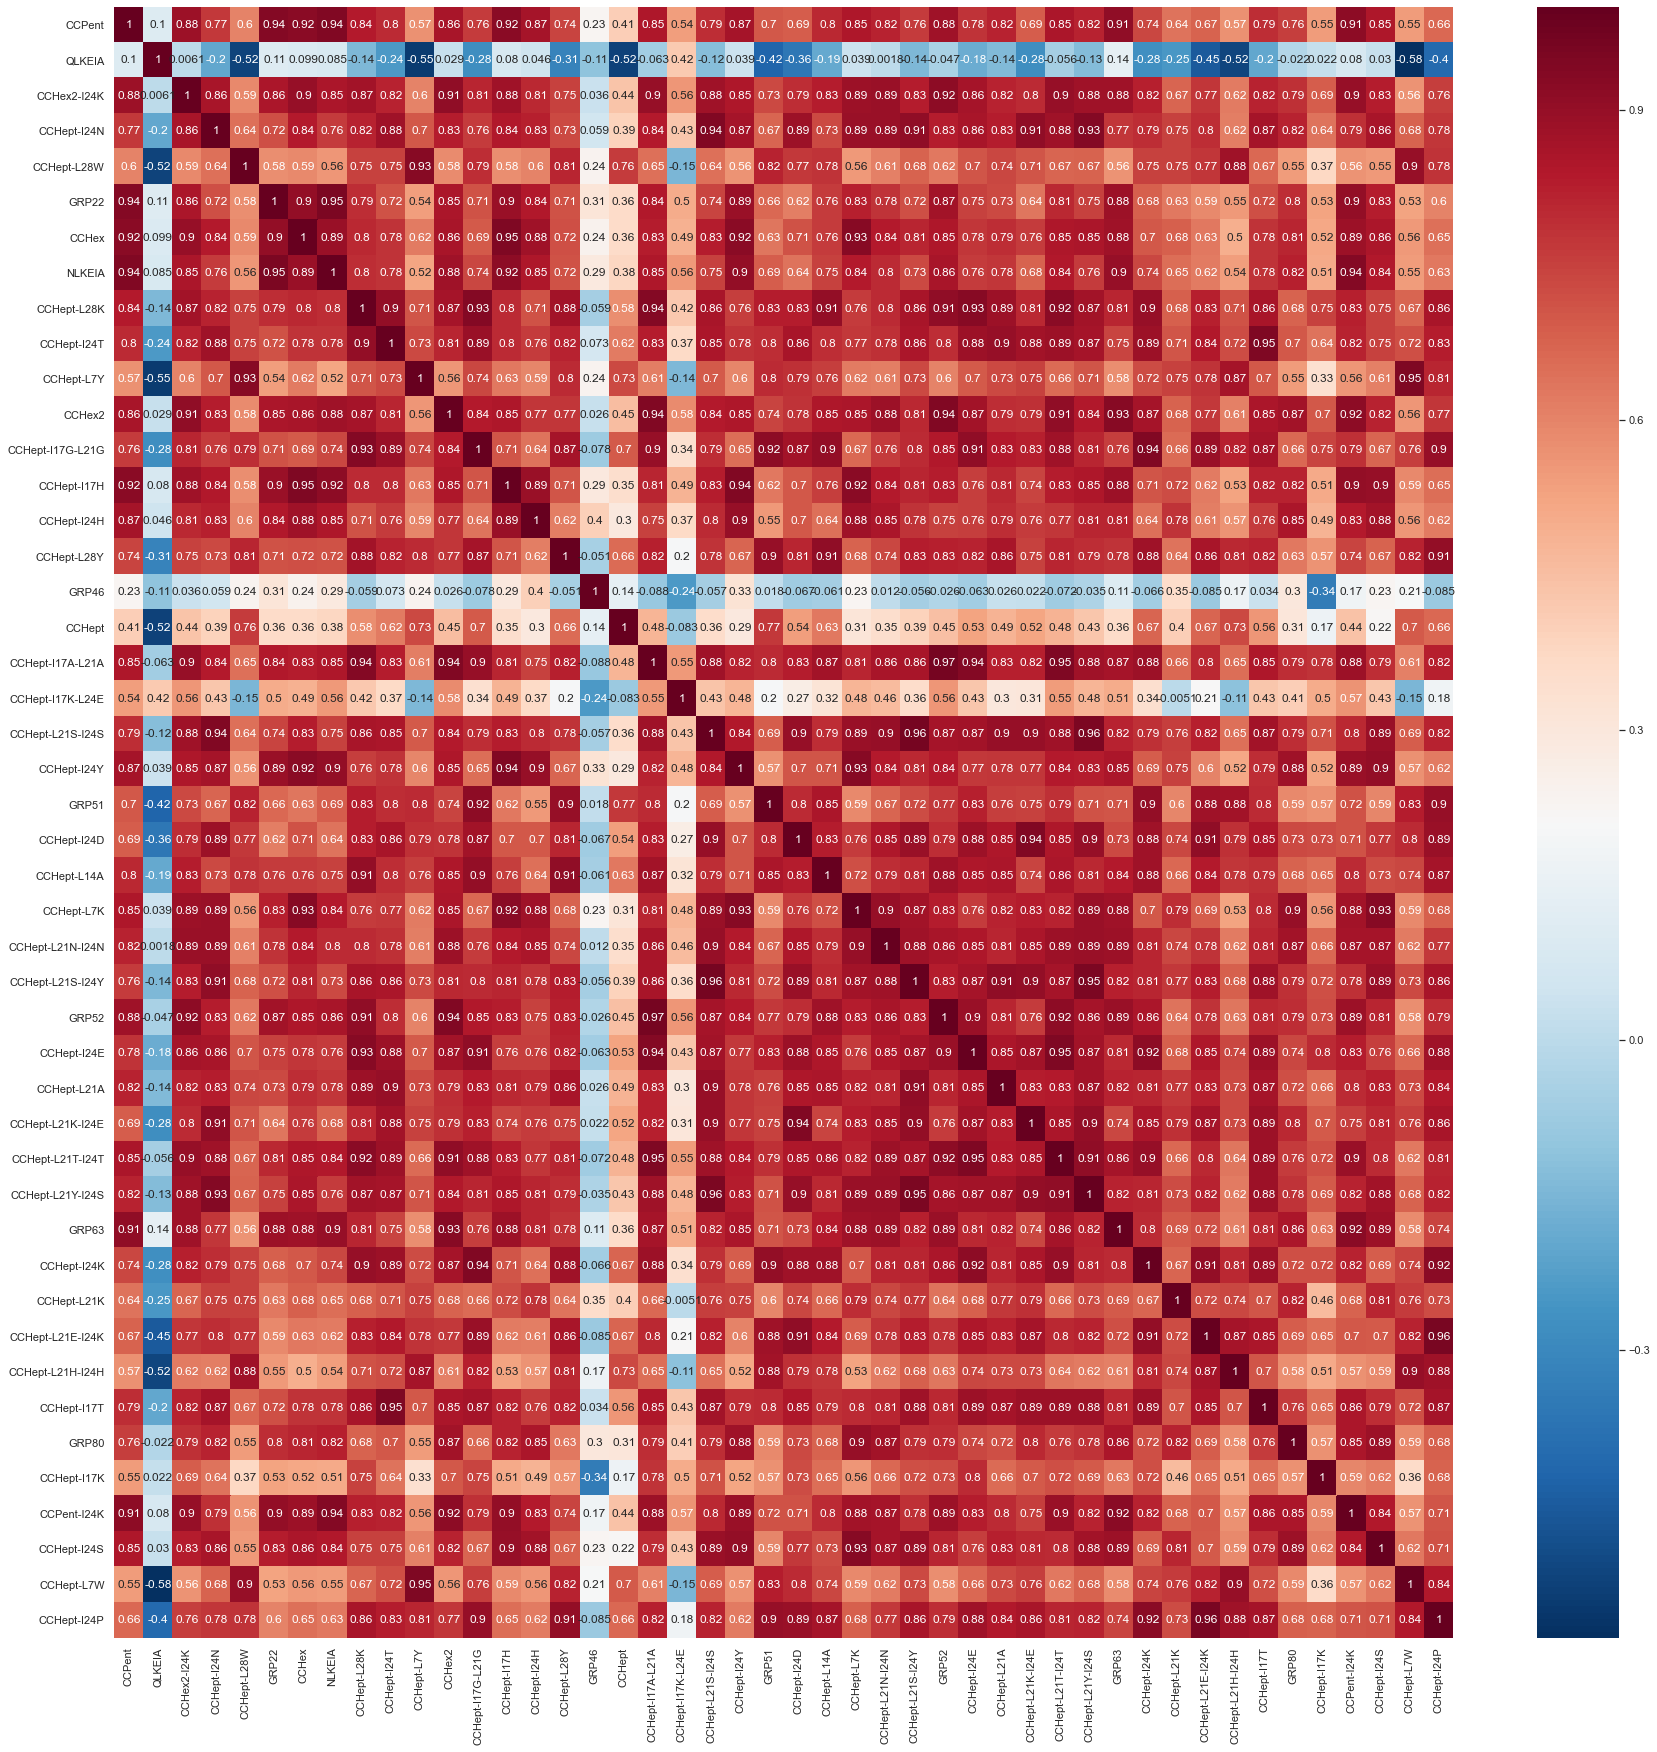

In [23]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
ml.calc_feature_correlations(train_data=ml.fluor_data)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

- Measure the relative importances of the initial 46 features

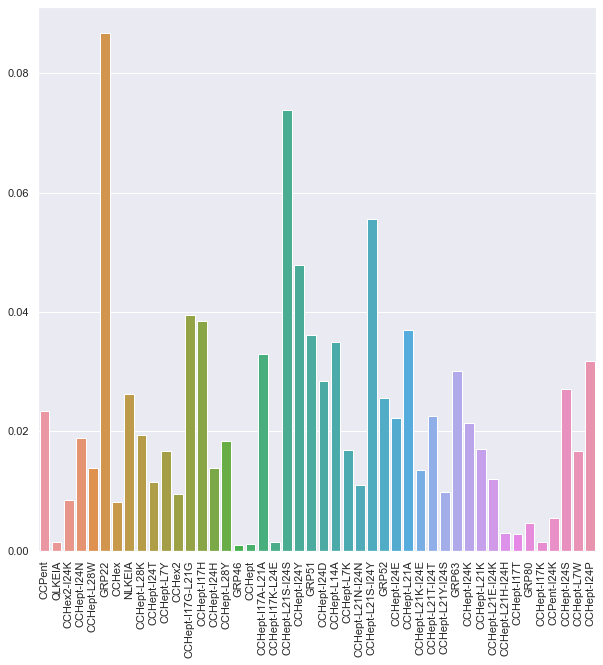

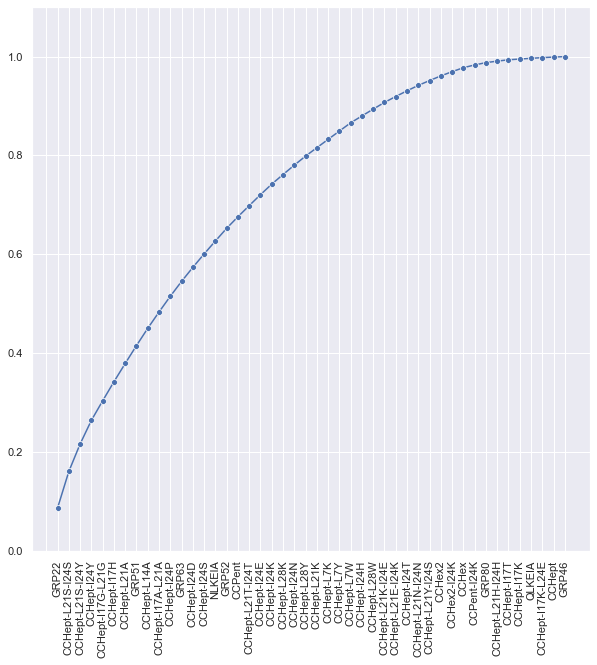

Feature     Score
0              GRP22  0.086703
1   CCHept-L21S-I24S  0.073885
2   CCHept-L21S-I24Y  0.055570
3        CCHept-I24Y  0.047811
4   CCHept-I17G-L21G  0.039540
5        CCHept-I17H  0.038559
6        CCHept-L21A  0.036983
7              GRP51  0.036194
8        CCHept-L14A  0.034941
9   CCHept-I17A-L21A  0.033031
10       CCHept-I24P  0.031783
11             GRP63  0.030156
12       CCHept-I24D  0.028363
13       CCHept-I24S  0.027147
14            NLKEIA  0.026213
15             GRP52  0.025673
16            CCPent  0.023405
17  CCHept-L21T-I24T  0.022505
18       CCHept-I24E  0.022184
19       CCHept-I24K  0.021330
20       CCHept-L28K  0.019414
21       CCHept-I24N  0.018915
22       CCHept-L28Y  0.018366
23       CCHept-L21K  0.016968
24        CCHept-L7K  0.016882
25        CCHept-L7Y  0.016778
26        CCHept-L7W  0.016748
27       CCHept-I24H  0.013906
28       CCHept-L28W  0.013788
29  CCHept-L21K-I24E  0.013584
30  CCHept-L21E-I24K  0.011963
31       CCHept-I24T  0.011532
32  CCHept-L21N-I24N  0.010970
33  CCHept-L21Y-I24S  0.009769
34            CCHex2  0.009435
35       CCHex2-I24K  0.008523
36             CCHex  0.008093
37       CCPent-I24K  0.005500
38             GRP80  0.004722
39  CCHept-L21H-I24H  0.002991
40       CCHept-I17T  0.002788
41       CCHept-I17K  0.001493
42            QLKEIA  0.001442
43  CCHept-I17K-L24E  0.001402
44            CCHept  0.001133
45             GRP46  0.000919

In [24]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

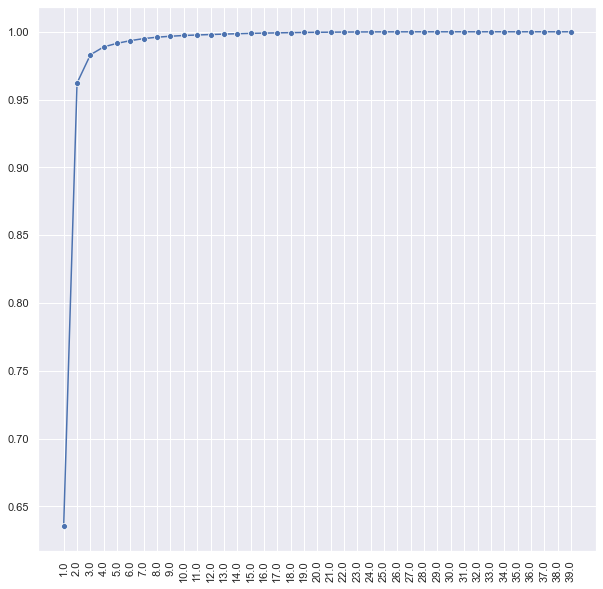

In [25]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 46 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [28]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 40)]})
# Are only 39 components (even though there are 46 barrels) because the PCA algorithm in sklearn calculates
# a maximum of n_features or n_samples components (whichever of the two is smaller)
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [29]:
pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1         -0.104846  0.721800    -0.089582    -0.123123    -0.118344   
2          0.125153  0.622344     0.098307     0.151629     0.079127   
3          0.021054  0.091174     0.019075     0.039537    -0.078866   
4          0.134239 -0.064808     0.101290    -0.198439     0.002882   
5          0.104942 -0.184392     0.041460     0.116855    -0.220704   
6          0.069170  0.167960     0.077171    -0.045386    -0.076443   
7         -0.085888 -0.086184    -0.134810    -0.183716    -0.238795   
8         -0.038578 -0.009663    -0.149729    -0.031392    -0.134907   
9          0.200833 -0.018127     0.205325    -0.087432     0.075761   
10         0.117881 -0.015102    -0.358829    -0.050059     0.330095   
11         0.226091 -0.041662    -0.005860     0.139905    -0.337586   
12        -0.047744 -0.019057     0.246312     0.253237     0.038536   
13         0.143119 -0.014813    -0.002601    -0.177489     0.171364   
14         0.009188  0.005080    -0.203388    -0.228691    -0.143718   
15        -0.053676  0.046396    -0.033748    -0.018049    -0.091540   
16        -0.149702 -0.016293    -0.141239    -0.033383     0.218472   
17        -0.259211 -0.033372    -0.012410     0.150355     0.000952   
18        -0.023750 -0.007429    -0.396835     0.171313     0.116797   
19        -0.215804 -0.037036     0.099609    -0.048129     0.012022   
20         0.240913  0.009372    -0.200146     0.174999     0.063058   
21         0.120523 -0.001219    -0.106436    -0.127951     0.097903   
22        -0.226270 -0.003969     0.149946    -0.157406    -0.145601   
23         0.170711  0.005217    -0.181913     0.111492    -0.153993   
24        -0.154578 -0.013575     0.098606     0.164249     0.105069   
25        -0.092410  0.006282     0.108901    -0.135796     0.397417   
26         0.075464  0.011686    -0.133962     0.034153    -0.103153   
27        -0.064249  0.006753    -0.204354    -0.099579     0.093491   
28         0.066474  0.024540     0.034962     0.319304    -0.119244   
29        -0.385393  0.004009    -0.075845    -0.111565    -0.150883   
30        -0.215246  0.001113    -0.076957    -0.019787    -0.168055   
31         0.187910  0.011220    -0.039976    -0.359938     0.055597   
32        -0.097181  0.007174    -0.054726     0.138797     0.321612   
33         0.041971 -0.004019     0.000746    -0.201346     0.071823   
34         0.126126 -0.007465    -0.048843     0.092089    -0.108763   
35         0.014806 -0.004628     0.079756     0.257380     0.104609   
36        -0.259159  0.006174    -0.077334     0.076615    -0.047866   
37         0.172655 -0.000880    -0.032964     0.032802     0.036120   
38         0.061642  0.001654    -0.175445    -0.184068    -0.189897   
39         0.021713  0.004274    -0.033376     0.051270     0.024229   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1         -0.072253 -0.087691 -0.070512    -0.095287    -0.115686  ...   
2          0.077631  0.137825  0.077991     0.118389     0.137534  ...   
3          0.008261  0.019110  0.010444    -0.069381    -0.003802  ...   
4          0.204112  0.012484  0.130934     0.113443     0.038672  ...   
5         -0.001136  0.274933  0.034735    -0.008446    -0.008954  ...   
6          0.080474  0.098582  0.041942    -0.008523    -0.105694  ...   
7         -0.031906 -0.288614 -0.049051    -0.198704    -0.236021  ...   
8         -0.025906  0.042710  0.120179    -0.091218     0.199527  ...   
9         -0.040779 -0.213883 -0.104945    -0.003692     0.089815  ...   
10        -0.007541 -0.147236  0.053614     0.103666     0.401467  ...   
11        -0.131815  0.186824  0.012903    -0.114651     0.027833  ...   
12         0.033935 -0.200268  0.124360     0.106269     0.117275  ...   
13        -0.053777  0.1

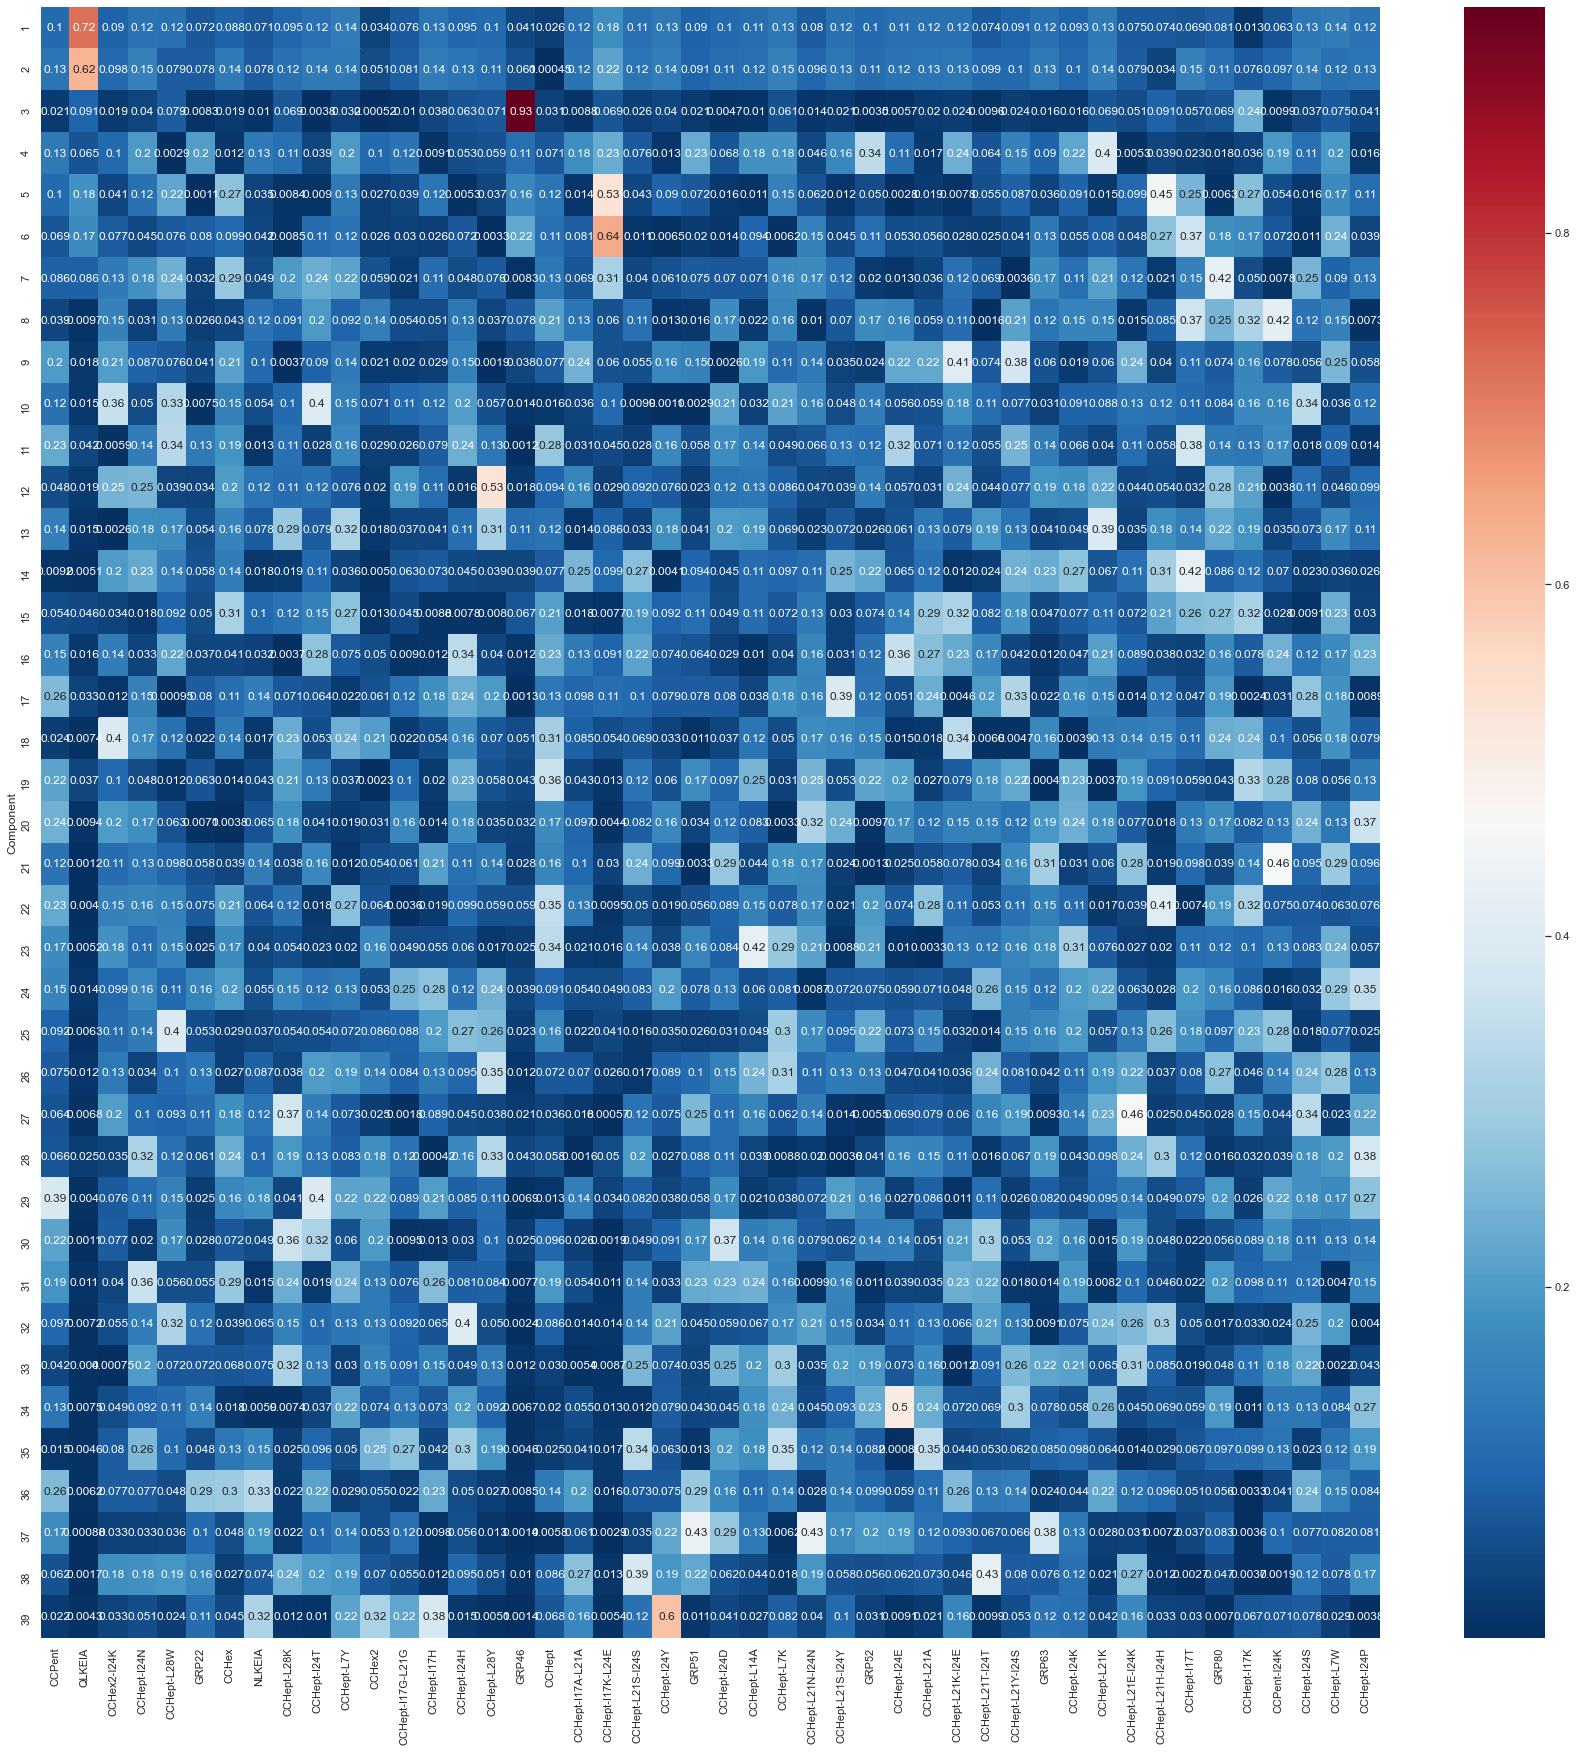

In [30]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

Relative contribution to the different components of each barrel

In [31]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [32]:
relative_pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1          0.021283  0.308737     0.020676     0.024148     0.023456   
2          0.025405  0.266196     0.022689     0.029739     0.015683   
3          0.004274  0.038998     0.004402     0.007754     0.015632   
4          0.027250  0.027720     0.023378     0.038920     0.000571   
5          0.021303  0.078870     0.009569     0.022918     0.043745   
6          0.014041  0.071842     0.017811     0.008901     0.015151   
7          0.017435  0.036864     0.031114     0.036032     0.047330   
8          0.007831  0.004133     0.034557     0.006157     0.026739   
9          0.040768  0.007753     0.047389     0.017148     0.015016   
10         0.023929  0.006460     0.082817     0.009818     0.065426   
11         0.045895  0.017820     0.001352     0.027439     0.066911   
12         0.009692  0.008151     0.056849     0.049667     0.007638   
13         0.029052  0.006336     0.000600     0.034811     0.033965   
14         0.001865  0.002173     0.046942     0.044853     0.028485   
15         0.010896  0.019845     0.007789     0.003540     0.018144   
16         0.030389  0.006969     0.032598     0.006547     0.043302   
17         0.052618  0.014274     0.002864     0.029489     0.000189   
18         0.004821  0.003177     0.091589     0.033599     0.023150   
19         0.043807  0.015842     0.022990     0.009439     0.002383   
20         0.048904  0.004009     0.046193     0.034322     0.012498   
21         0.024465  0.000521     0.024565     0.025095     0.019405   
22         0.045931  0.001697     0.034607     0.030872     0.028859   
23         0.034653  0.002231     0.041985     0.021867     0.030522   
24         0.031378  0.005806     0.022758     0.032214     0.020825   
25         0.018759  0.002687     0.025134     0.026633     0.078770   
26         0.015319  0.004998     0.030918     0.006698     0.020445   
27         0.013042  0.002888     0.047165     0.019530     0.018530   
28         0.013494  0.010496     0.008069     0.062625     0.023635   
29         0.078232  0.001715     0.017505     0.021881     0.029906   
30         0.043694  0.000476     0.017762     0.003881     0.033309   
31         0.038145  0.004799     0.009226     0.070594     0.011020   
32         0.019727  0.003069     0.012631     0.027222     0.063745   
33         0.008520  0.001719     0.000172     0.039490     0.014236   
34         0.025603  0.003193     0.011273     0.018061     0.021557   
35         0.003006  0.001979     0.018408     0.050479     0.020734   
36         0.052608  0.002641     0.017849     0.015026     0.009487   
37         0.035048  0.000377     0.007608     0.006433     0.007159   
38         0.012513  0.000708     0.040493     0.036101     0.037638   
39         0.004408  0.001828     0.007703     0.010055     0.004802   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1          0.024935  0.017861  0.020493     0.020701     0.023794  ...   
2          0.026791  0.028072  0.022666     0.025720     0.028288  ...   
3          0.002851  0.003892  0.003035     0.015073     0.000782  ...   
4          0.070440  0.002543  0.038053     0.024645     0.007954  ...   
5          0.000392  0.055998  0.010095     0.001835     0.001842  ...   
6          0.027772  0.020079  0.012189     0.001852     0.021739  ...   
7          0.011011  0.058784  0.014256     0.043168     0.048544  ...   
8          0.008940  0.008699  0.034927     0.019817     0.041038  ...   
9          0.014073  0.043563  0.030500     0.000802     0.018473  ...   
10         0.002602  0.029988  0.015581     0.022521     0.082573  ...   
11         0.045490  0.038052  0.003750     0.024908     0.005725  ...   
12         0.011711  0.040790  0.036142     0.023087     0.024121  ...   
13         0.018559  0.0

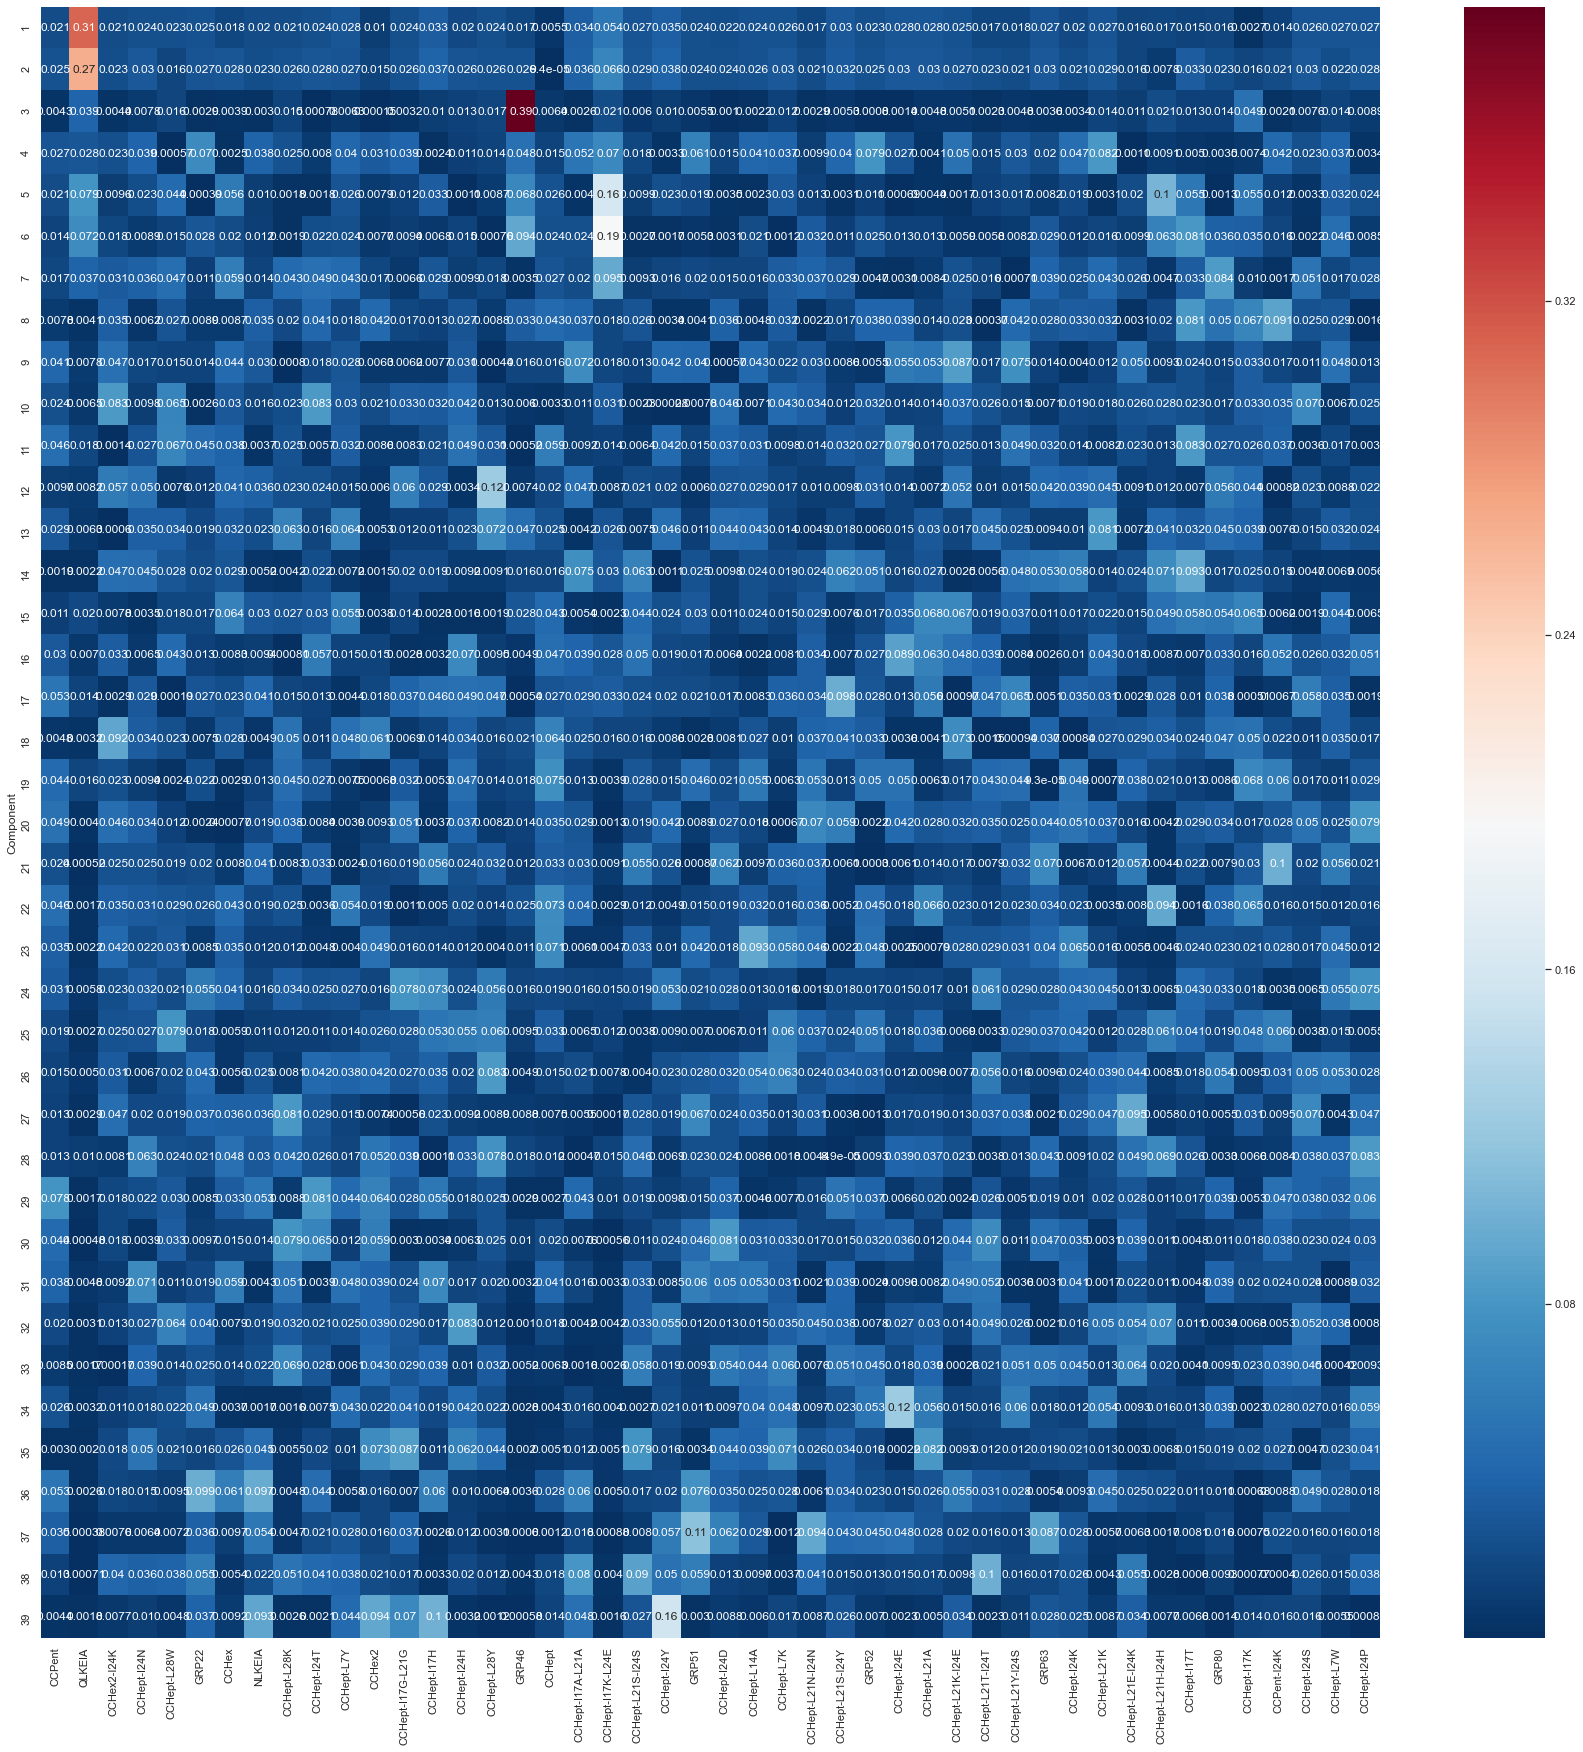

In [33]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [34]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

Scatter plots of data transformed to PCA dimensions

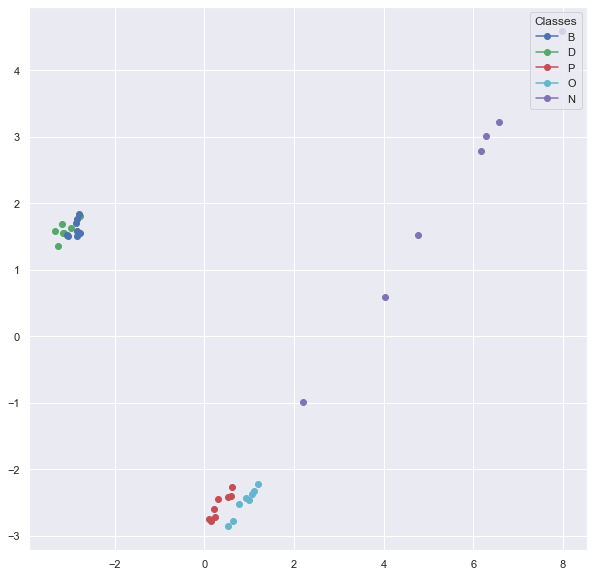

In [35]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['B', 'D', 'P', 'O', 'N'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

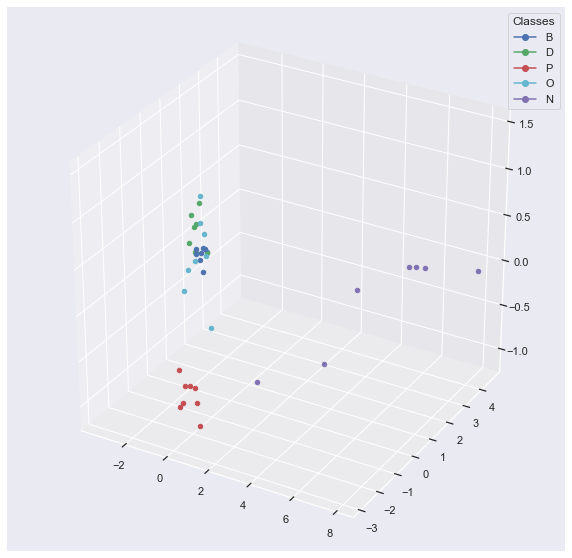

In [36]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['B', 'D', 'P', 'O', 'N'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

3 features required to explain ~98% of the signal. But, for comparison with the AA and sugar large array analysis, will retain all 46 features

In [37]:
n_components = None

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [38]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 1000.0}
Best score: 1.0






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 1000.0}
Best score: 1.0
All parameter combinations tested:
1 {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.01} nan
2 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 10000.0} nan
3 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 1000.0} 1.0
4 {'Logistic

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.000244140625, 'SVC__C': 362.03867196751236}
Best score: 1.0






SVC: no_balancing
Best parameters: {'SVC__gamma': 0.000244140625, 'SVC__C': 362.03867196751236}
Best score: 1.0
All parameter combinations tested:
1 {'SVC__gamma': 0.0001220703125, 'SVC__C': 0.03125} 0.29
2 {'SVC__gamma': 0.011048543456039806, 'SVC__C': 1.0} 0.805
3 {'SVC__gamma': 0.00017263349150062197, 'SVC__C': 0.0625} 0.29
4 {'SVC__gamma': 0.000244140625, 'SVC__C': 362.03867196751236} 1.0
5 {'SVC__gamma': 0.0001220703125, 'SVC__C': 90.50966799187809} 0.805
6 {'SVC__gamma': 0.00390625, 'SVC__C': 32.0} 1.0
7 {'SVC__gamma': 0.001953125, 'SVC__C': 181.01933598375618} 1.0
8 {'SVC__gamma': 1.4142135623730951, 'SVC__C': 1.4142135623730951} 0.557
9 {'SVC__gamma': 8.631674575031098e-05, 'SVC__C': 256.0} 0.933
10 {'SVC__gamma': 0.0013810679320049757, 'SVC__C': 90.50966799187809} 1.0
11 {'SVC__gamma': 1.4142135623730951, 'SVC__C': 0.25} 0.29
12 {

In [39]:
score_df

Algorithm Resampling_method  \
0    LogisticRegression      no_balancing   
1  KNeighborsClassifier      no_balancing   
2            GaussianNB      no_balancing   
3             LinearSVC      no_balancing   
4                   SVC      no_balancing   

                                         Best_params  Best_accuracy_score  \
0  {'LogisticRegression__solver': 'newton-cg', 'L...                  1.0   
1  {'KNeighborsClassifier__weights': 'uniform', '...                  1.0   
2                                                 {}                  1.0   
3                           {'LinearSVC__C': 0.0625}                  1.0   
4  {'SVC__gamma': 0.000244140625, 'SVC__C': 362.0...                  1.0   

   Mean_accuracy_score  Std_dev_accuracy_score  
0             0.918768                0.012715  
1             0.998333                0.003333  
2             1.000000                0.000000  
3             1.000000                0.000000  
4             0.774095                0.064252

So, from this spot check, all of the algorithms with parameters that can be tuned have 100% accuracy.

So, run hyperparameter optimisation for SVC for fairest comparison with standard array data (which I have fitted with a SVC below).

In [40]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.08838834764831845, 'SVC__C': 8192.0}
Best score: 1.0


No need for any further hyperparameter optimisation since am already achieving 100% accuracy.

### So, optimal hyperparameter combination:
- C = 8200
- gamma = 0.09

(Note how different these values are from the C and gamma values selected during spot check, which also achieved an accuracy of 1.)

Model cross-validation score: [1. 1. 1. 1. 1.]
accuracy_score: 1.0
recall_score: 1.0
precision_score: 1.0
f1_score: 1.0
cohen_kappa_score: 1.0
None


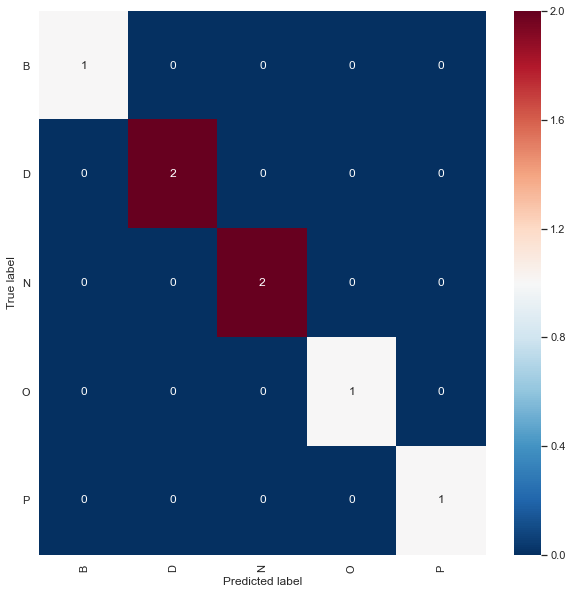

true


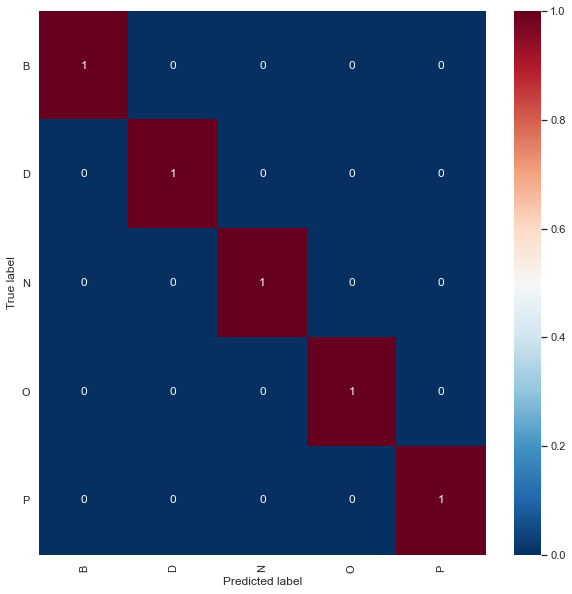

pred


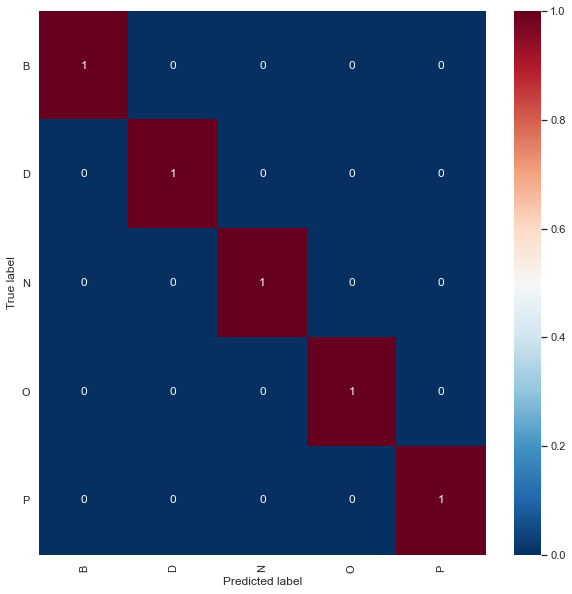

In [41]:
final_params = {'C': 8200,
                'gamma': 0.09}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

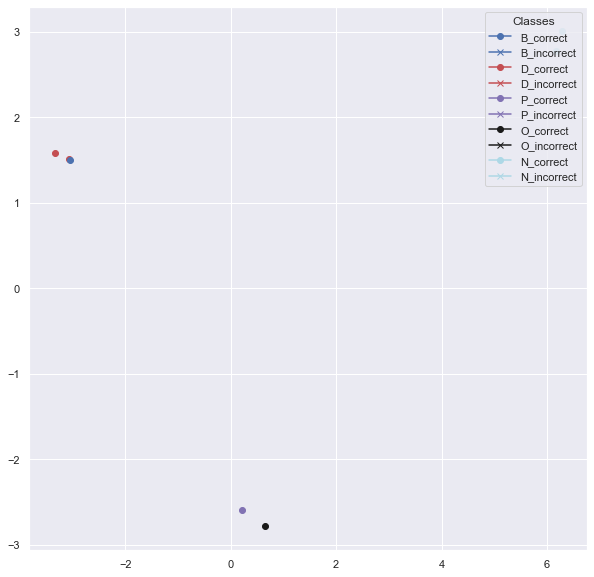

In [44]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['B_correct', 'B_incorrect', 'D_correct', 'D_incorrect', 'P_correct', 'P_incorrect',
                'O_correct', 'O_incorrect', 'N_correct', 'N_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

- Standard array

In [45]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

First split the data into a training and test set

In [46]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/FAs/'
                'FAs_standard_array_ML_results/', fluor_data=s_fa_fluor_data
)

Directory /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/FAs/FAs_standard_array_ML_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Large_array/FAs/FAs_standard_array_ML_results/?y


In [47]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

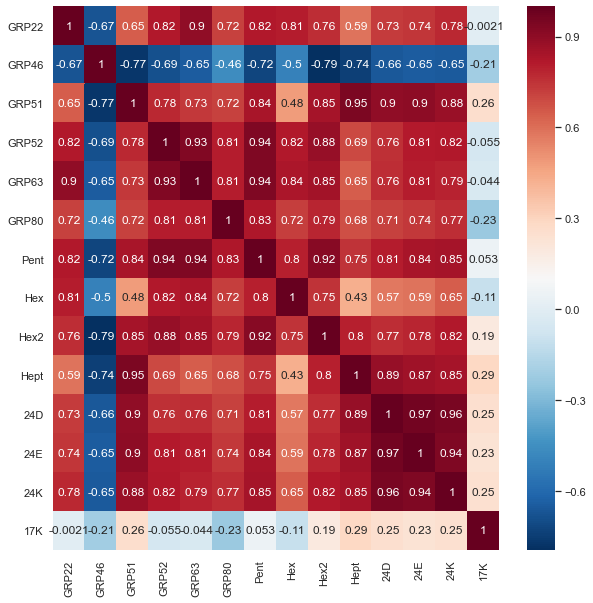

GRP22     GRP46     GRP51     GRP52     GRP63     GRP80      Pent  \
GRP22  1.000000 -0.669043  0.648218  0.822702  0.897373  0.715572  0.820450   
GRP46 -0.669043  1.000000 -0.771107 -0.686304 -0.646529 -0.462101 -0.718574   
GRP51  0.648218 -0.771107  1.000000  0.777861  0.734709  0.717261  0.844278   
GRP52  0.822702 -0.686304  0.777861  1.000000  0.933771  0.809193  0.942026   
GRP63  0.897373 -0.646529  0.734709  0.933771  1.000000  0.806754  0.942589   
GRP80  0.715572 -0.462101  0.717261  0.809193  0.806754  1.000000  0.830957   
Pent   0.820450 -0.718574  0.844278  0.942026  0.942589  0.830957  1.000000   
Hex    0.809568 -0.504503  0.483114  0.820263  0.836585  0.723077  0.801313   
Hex2   0.763227 -0.794934  0.845966  0.884428  0.854409  0.785366  0.921388   
Hept   0.588743 -0.739587  0.949343  0.692683  0.645028  0.678424  0.752908   
24D    0.731895 -0.659099  0.896623  0.759475  0.761914  0.713133  0.805066   
24E    0.743527 -0.646154  0.904503  0.812946  0.806942  0.739400  0.841088   
24K    0.780300 -0.648780  0.880300  0.822326  0.793058  0.766041  0.851407   
17K   -0.002064 -0.206379  0.260976 -0.054972 -0.044090 -0.228705  0.053096   

            Hex      Hex2      Hept       24D       24E       24K       17K  
GRP22  0.809568  0.763227  0.588743  0.731895  0.743527  0.780300 -0.002064  
GRP46 -0.504503 -0.794934 -0.739587 -0.659099 -0.646154 -0.648780 -0.206379  
GRP51  0.483114  0.845966  0.949343  0.896623  0.904503  0.880300  0.260976  
GRP52  0.820263  0.884428  0.692683  0.759475  0.812946  0.822326 -0.054972  
GRP63  0.836585  0.854409  0.645028  0.761914  0.806942  0.793058 -0.044090  
GRP80  0.723077  0.785366  0.678424  0.713133  0.739400  0.766041 -0.228705  
Pent   0.801313  0.921388  0.752908  0.805066  0.841088  0.851407  0.053096  
Hex    1.000000  0.752158  0.425141  0.572983  0.588368  0.647280 -0.105816  
Hex2   0.752158  1.000000  0.799062  0.766041  0.784053  0.819887  0.187992  
Hept   0.425141  0.799062  1.000000  0.886867  0.866041  0.851782  0.286492  
24D    0.572983  0.766041  0.886867  1.000000  0.965478  0.957223  0.251220  
24E    0.588368  0.784053  0.866041  0.965478  1.000000  0.939400  0.233583  
24K    0.647280  0.819887  0.851782  0.957223  0.939400  1.000000  0.246717  
17K   -0.105816  0.187992  0.286492  0.251220  0.233583  0.246717  1.000000

In [48]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

- Measure the relative importances of the initial 14 features

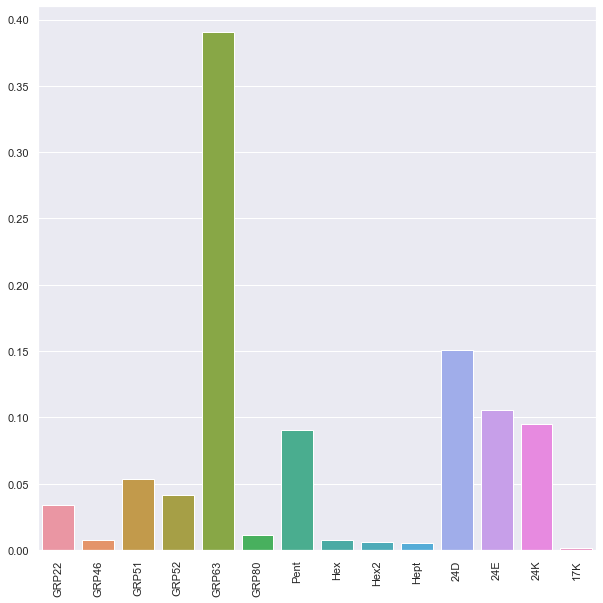

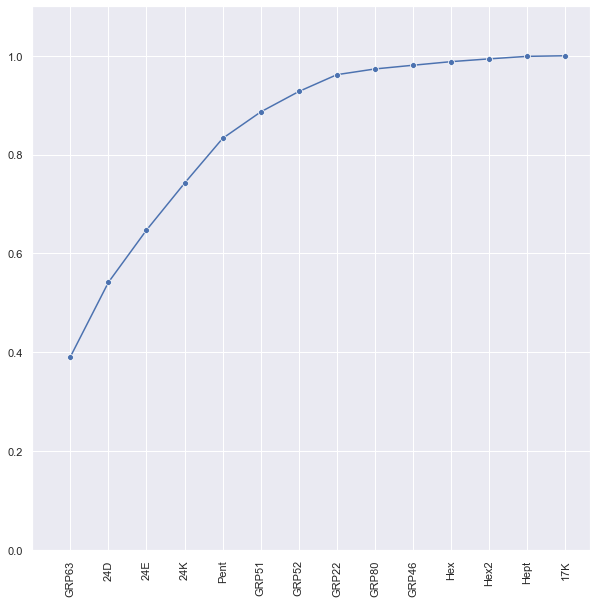

Feature     Score
0    GRP63  0.390478
1      24D  0.150899
2      24E  0.105747
3      24K  0.094977
4     Pent  0.090672
5    GRP51  0.053561
6    GRP52  0.041310
7    GRP22  0.034070
8    GRP80  0.011567
9    GRP46  0.007511
10     Hex  0.007275
11    Hex2  0.005627
12    Hept  0.005078
13     17K  0.001226

In [49]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

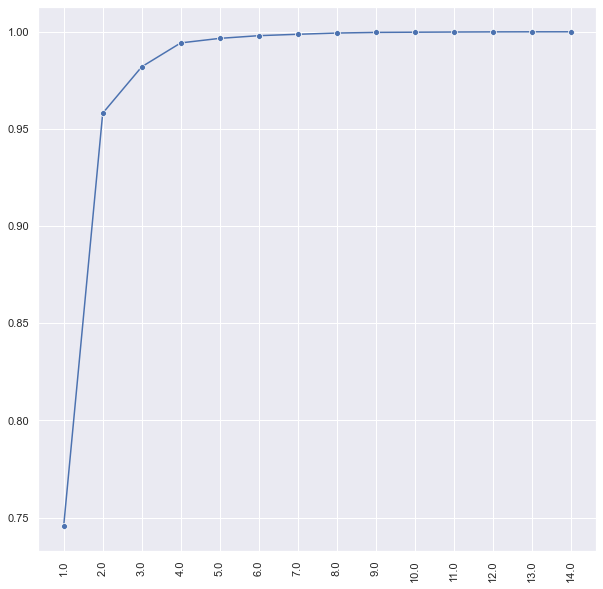

In [50]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [51]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [52]:
pca_components

GRP22     GRP46     GRP51     GRP52     GRP63     GRP80  \
Component                                                               
1         -0.182717  0.770659 -0.194955 -0.217695 -0.216316 -0.138990   
2          0.229240  0.594688  0.218867  0.240824  0.260643  0.267149   
3         -0.007546  0.187908  0.152658 -0.066427  0.001374  0.113402   
4          0.007128  0.084868 -0.111946 -0.066931 -0.018603  0.136001   
5         -0.570090 -0.035796  0.143098  0.135328 -0.098808  0.335868   
6          0.051115  0.045012 -0.033782  0.628537  0.144737 -0.107334   
7         -0.109815 -0.059685 -0.137843  0.134028 -0.117309  0.741688   
8         -0.076651  0.045957  0.084809  0.586692 -0.066099 -0.328920   
9         -0.660725  0.029049 -0.229430  0.103197 -0.050850 -0.214652   
10        -0.226291  0.008521  0.550107 -0.290747  0.176552 -0.196651   
11         0.196991  0.002850 -0.304304 -0.038187 -0.260580 -0.070972   
12        -0.042513  0.003139 -0.601862 -0.077558  0.341335 -0.053597   
13        -0.119358  0.000178  0.119952 -0.025048 -0.132401 -0.001140   
14        -0.160566 -0.001708 -0.077192 -0.083019  0.774845  0.051776   

               Pent       Hex      Hex2      Hept       24D       24E  \
Component                                                               
1         -0.200181 -0.155398 -0.088214 -0.133091 -0.196592 -0.212189   
2          0.239591  0.132496  0.090131  0.089508  0.234794  0.259987   
3          0.020338 -0.215872  0.053595  0.424447  0.068427  0.045973   
4          0.025732  0.865663  0.081690 -0.253755 -0.082528 -0.074536   
5          0.043295  0.005599  0.619337  0.184889 -0.145620 -0.198474   
6          0.089317 -0.271415  0.194096 -0.580399 -0.115101 -0.054520   
7          0.114613 -0.121543 -0.537852 -0.076669 -0.150981  0.070523   
8          0.016471  0.256550 -0.322098  0.495872 -0.131125 -0.140180   
9          0.072743  0.059304 -0.215373 -0.097727  0.181867  0.351032   
10         0.499618 -0.003939 -0.150162 -0.170336 -0.273830  0.194964   
11         0.679321 -0.051173  0.047224  0.110700 -0.295670 -0.307513   
12         0.284356 -0.038999  0.194835  0.186058  0.168593  0.274941   
13         0.270571 -0.016254 -0.122532 -0.136677  0.760087 -0.487020   
14        -0.087946 -0.009907 -0.190068  0.052885 -0.136573 -0.494110   

                24K       17K  
Component                      
1         -0.209915 -0.061138  
2          0.257548 -0.261621  
3          0.044171  0.827808  
4         -0.078083  0.342534  
5         -0.066478 -0.166342  
6         -0.097508  0.291176  
7         -0.180788  0.005145  
8         -0.266043 -0.068603  
9          0.471481  0.085508  
10        -0.278328  0.008288  
11         0.365527 -0.003481  
12        -0.501276 -0.017184  
13        -0.175690  0.015836  
14         0.220569  0.009845

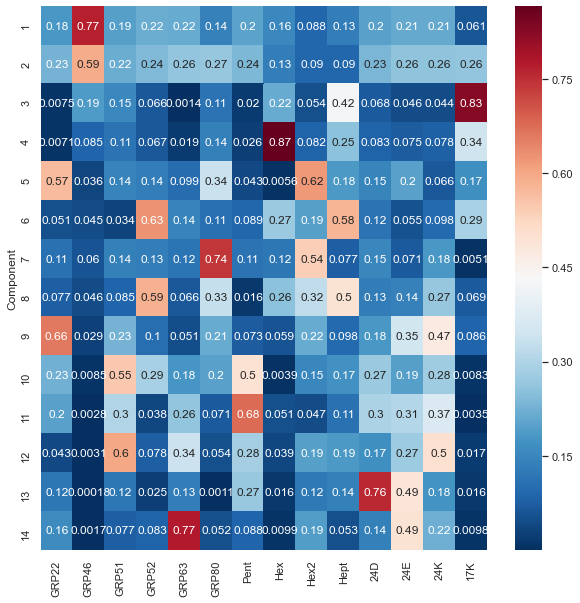

In [53]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Relative contribution to the different components of each barrel

In [54]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [55]:
relative_pca_components

GRP22     GRP46     GRP51     GRP52     GRP63     GRP80  \
Component                                                               
1          0.069191  0.412113  0.065845  0.080801  0.081308  0.050393   
2          0.086809  0.318012  0.073921  0.089385  0.097970  0.096859   
3          0.002858  0.100485  0.051560  0.024656  0.000517  0.041115   
4          0.002699  0.045383  0.037809  0.024843  0.006992  0.049309   
5          0.215882  0.019142  0.048331  0.050229  0.037139  0.121773   
6          0.019356  0.024070  0.011410  0.233291  0.054403  0.038915   
7          0.041585  0.031917  0.046556  0.049746  0.044094  0.268909   
8          0.029026  0.024576  0.028644  0.217760  0.024845  0.119254   
9          0.250204  0.015534  0.077489  0.038303  0.019113  0.077825   
10         0.085692  0.004556  0.185796  0.107915  0.066362  0.071299   
11         0.074597  0.001524  0.102778  0.014174  0.097946  0.025732   
12         0.016099  0.001679  0.203277  0.028787  0.128300  0.019432   
13         0.045199  0.000095  0.040513  0.009297  0.049766  0.000413   
14         0.060803  0.000913  0.026071  0.030814  0.291246  0.018772   

               Pent       Hex      Hex2      Hept       24D       24E  \
Component                                                               
1          0.075709  0.070504  0.030343  0.044467  0.066827  0.067022   
2          0.090614  0.060113  0.031003  0.029906  0.079813  0.082119   
3          0.007692  0.097941  0.018435  0.141812  0.023260  0.014521   
4          0.009732  0.392749  0.028099  0.084782  0.028054  0.023543   
5          0.016374  0.002540  0.213035  0.061774  0.049501  0.062690   
6          0.033780  0.123141  0.066764  0.193918  0.039126  0.017221   
7          0.043347  0.055144  0.185007  0.025616  0.051323  0.022275   
8          0.006229  0.116396  0.110793  0.165677  0.044573  0.044277   
9          0.027511  0.026906  0.074082  0.032652  0.061822  0.110877   
10         0.188956  0.001787  0.051652  0.056911  0.093083  0.061581   
11         0.256920  0.023217  0.016244  0.036986  0.100507  0.097131   
12         0.107544  0.017694  0.067018  0.062164  0.057310  0.086843   
13         0.102330  0.007374  0.042148  0.045665  0.258376  0.153830   
14         0.033261  0.004495  0.065378  0.017670  0.046425  0.156069   

                24K       17K  
Component                      
1          0.065325  0.028246  
2          0.080148  0.120869  
3          0.013746  0.382446  
4          0.024299  0.158250  
5          0.020688  0.076850  
6          0.030344  0.134523  
7          0.056261  0.002377  
8          0.082792  0.031695  
9          0.146723  0.039504  
10         0.086615  0.003829  
11         0.113751  0.001608  
12         0.155995  0.007939  
13         0.054674  0.007316  
14         0.068640  0.004548

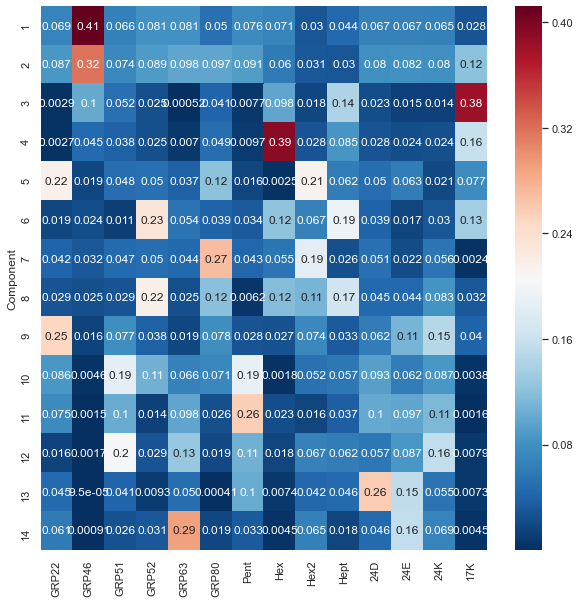

In [56]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

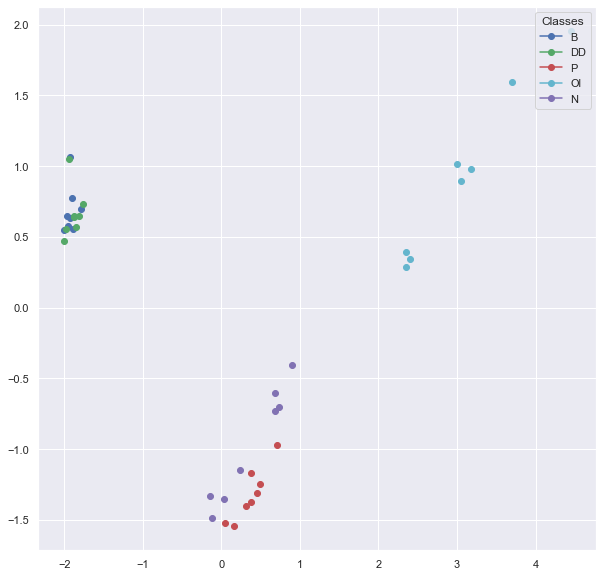

In [57]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['B', 'DD', 'P', 'Ol', 'N'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

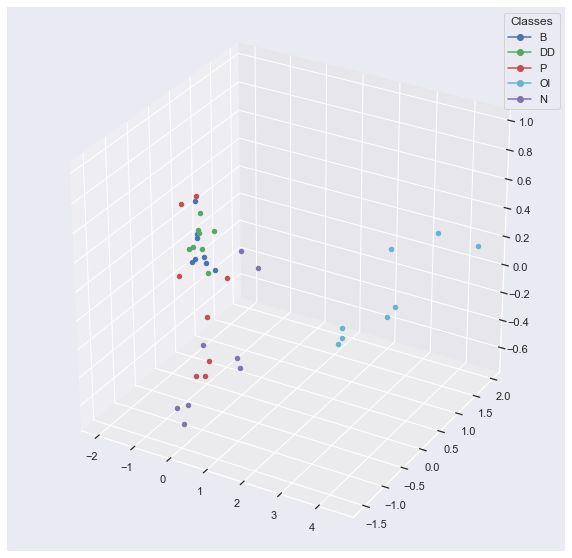

In [58]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['B', 'DD', 'P', 'Ol', 'N'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

3 features required to explain ~98% of the signal. But, for comparison with the AA and sugar large array analysis, will retain all 14 features

In [59]:
n_components = None

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [60]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)  # Actual number of x samples will be
    # different owing to oversampling, but don't want to hard code this selection into the pipeline, so for now
    # this estimate will do
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 100000.0}
Best score: 0.9428571428571428
Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 100000.0}
Best score: 0.9428571428571428
All parameter combinations tested:
1 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 0

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 5.656854249492381}
Best score: 0.8476190476190476






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 5.656854249492381}
Best score: 0.8476190476190476
All parameter combinations tested:
1 {'LinearSVC__C': 32.0} 0.781
2 {'LinearSVC__C': 0.1767766952966369} 0.786
3 {'LinearSVC__C': 90.50966799187809} 0.843
4 {'LinearSVC__C': 724.0773439350247} 0.843
5 {'LinearSVC__C': 11.313708498984761} 0.781
6 {'LinearSVC__C': 45.254833995939045} 0.843
7 {'LinearSVC__C': 11585.237502960395} 0.81
8 {'LinearSVC__C': 1.0} 0.819
9 {'LinearSVC__C': 181.01933598375618} 0.843
10 {'LinearSVC__C': 2048.0} 0.81
11 {'LinearSVC__C': 23170.47500592079} 0.81
12 {'LinearSVC__C': 0.08838834764831845} 0.757
13 {'LinearSVC__C': 256.0} 0.843
14 {'LinearSVC__C': 4096.0} 0.81
15 {'LinearSVC__C': 22.627416997969522} 0.781
16 {'LinearSVC__C': 0.0625} 0.757
17 {'LinearSVC__C': 5.656854249492381} 0.848
18 {'LinearSVC__C': 0.70710678

In [61]:
score_df

Algorithm Resampling_method  \
0    LogisticRegression      no_balancing   
1  KNeighborsClassifier      no_balancing   
2            GaussianNB      no_balancing   
3             LinearSVC      no_balancing   
4                   SVC      no_balancing   

                                         Best_params  Best_accuracy_score  \
0  {'LogisticRegression__solver': 'saga', 'Logist...             0.942857   
1  {'KNeighborsClassifier__weights': 'distance', ...             0.876190   
2                                                 {}             0.842857   
3                {'LinearSVC__C': 5.656854249492381}             0.847619   
4            {'SVC__gamma': 0.25, 'SVC__C': 32768.0}             0.942857   

   Mean_accuracy_score  Std_dev_accuracy_score  
0             0.693878                0.087792  
1             0.810476                0.107754  
2             0.842857                0.139321  
3             0.810667                0.161310  
4             0.576952                0.101008

So, from this spot check, a **support vector classifier with radial basis function kernel** does a good job.

So, run hyperparameter optimisation for SVC.

In [65]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.5, 'SVC__C': 2896.309375740099}
Best score: 0.9428571428571428


In [67]:
grid_tuned_params = {'C': np.linspace(10, 3000, 300),
                     'gamma': np.linspace(0.01, 1, 100)}

svc_grid_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'SVC__C': 40.0, 'SVC__gamma': 0.24000000000000002}
Best score: 0.9666666666666666


### So, optimal hyperparameter combination:
- C = 40
- gamma = 0.24

Model cross-validation score: [0.85714286 0.85714286 1.         1.         1.        ]
accuracy_score: 0.5
recall_score: 0.6
precision_score: 0.6
f1_score: 0.6
cohen_kappa_score: 0.36
None


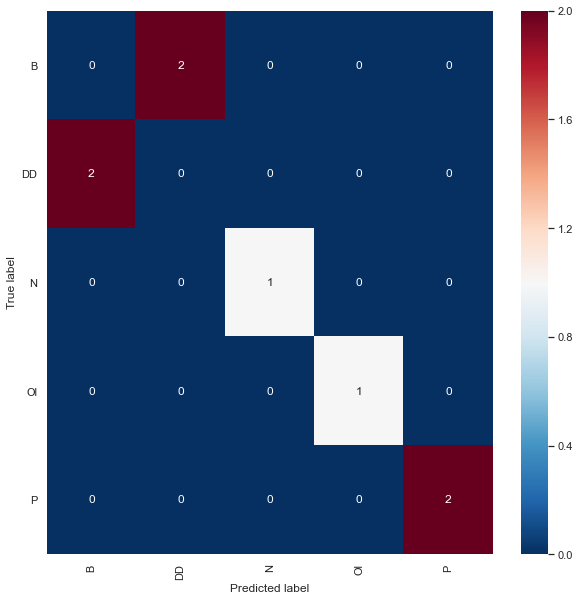

true


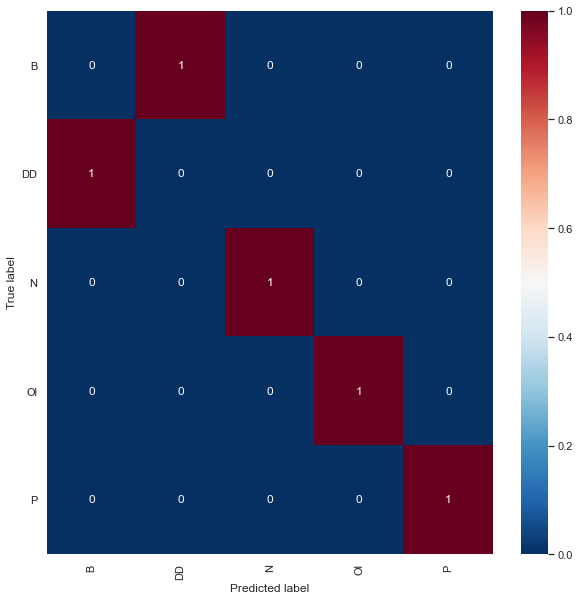

pred


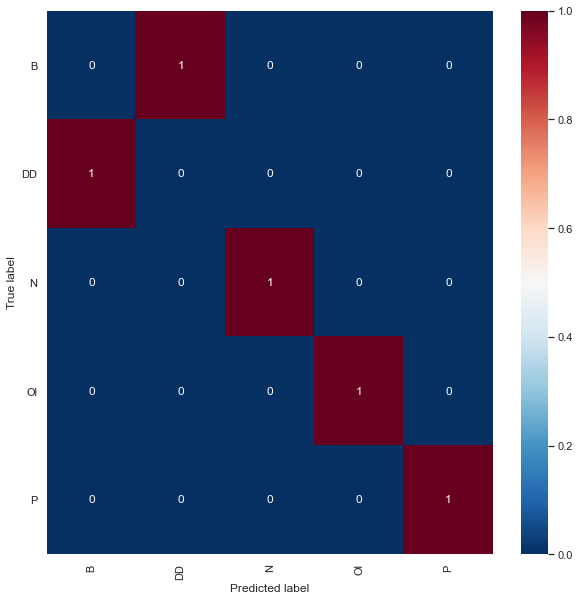

In [68]:
final_params = {'C': 40,
                'gamma': 0.24}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

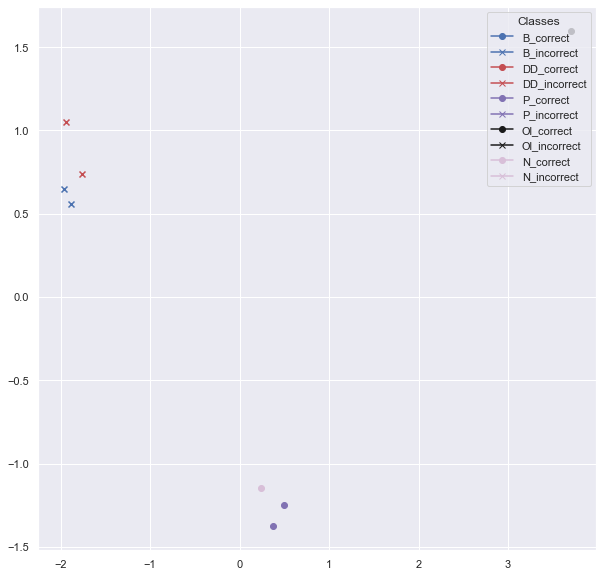

In [69]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['B_correct', 'B_incorrect', 'DD_correct', 'DD_incorrect', 'P_correct', 'P_incorrect',
                'Ol_correct', 'Ol_incorrect', 'N_correct', 'N_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

The additional signal present in the larger array enables unambiguous distinction of butanoic and dodecanoic acid, which is not possible with the information present in the smaller array.